## Venkat Sudhakar Gupta
vsudhakargupta1987@gmail.com

## Shashwat Sharma

shashwat969@gmail.com

## Lead Score Case Study

X Education: Education company that sells online courses to industry professionals. On any given day, many professionals who are interested in the courses land on their website and browse for courses.

The company markets its courses on several websites and search engines like Google. Once these people land on the website, they might browse the courses or fill up a form for the course or watch some videos. When these people fill up a form providing their email address or phone number, they are classified to be a lead. Moreover, the company also gets leads through past referrals. Once these leads are acquired, employees from the sales team start making calls, writing emails, etc. Through this process, some of the leads get converted while most do not. The typical lead conversion rate at X education is around 30%.

At 30% its lead conversion rate is very poor.

We need to build a model from which we can help them select the most promising leads.

We have leads dataset from the past with around 9000 data points which consists of various attributes such as Lead Source, Total Time Spent on Website, Total Visits, Last Activity, etc.

Here 'Converted' is the Target variable which tells whether a past lead was converted or not wherein 1 means it was converted and 0 means it wasn’t converted.

In this case study we will build a logistic regression model to assign a lead score between 0 and 100 to each of the leads which can be used by the company to target potential leads.

Let's Start.

### READING AND UNDERSTANDING DATA

In [2]:
# Supress warnings

import warnings
warnings.filterwarnings("ignore")

In [3]:
#Import the files

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
# code to view all the columns

pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)
pd.set_option('display.width', 1000)

In [5]:
# read the file

leads=pd.read_csv(r'C:\\Users\\dell\\Desktop\\Machine Learning 1\\7) Lead Scoring Case Study\\Leads.csv')
leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [6]:
# INSPECTION - check shape of the file

leads.shape

(9240, 37)

Thers are 37 columns in total with 9240 rows.

In [7]:
# INSPECTION - check datatype and null values in the columns

leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
Prospect ID                                      9240 non-null object
Lead Number                                      9240 non-null int64
Lead Origin                                      9240 non-null object
Lead Source                                      9204 non-null object
Do Not Email                                     9240 non-null object
Do Not Call                                      9240 non-null object
Converted                                        9240 non-null int64
TotalVisits                                      9103 non-null float64
Total Time Spent on Website                      9240 non-null int64
Page Views Per Visit                             9103 non-null float64
Last Activity                                    9137 non-null object
Country                                          6779 non-null object
Specialization                                   7802 

Datatype of the features is correct and matches the requirenment. So, there is no need to treat these datatypes.

In [8]:
# Check the value of null values in each columns.

round((leads.isnull().sum()/len(leads))*100,2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   15.56
How did you hear about X Education               23.89
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

Columns like "Asymmetrique Activity Index", "Asymmetrique Profile Index", "Asymmetrique Activity Score", "Asymmetrique Profile Score" and "Lead Quality" has very high amout of missing values, which is more than 45%. We need to drop these columns, as analysis with the help of these variables won't be relables.

Columns like "Country", "Specialization", "How did you hear about X Education", "What is your current occupation", "What matters most to you in choosing a course", "Tags", "Lead Profile" and  "City" also some missing values, but we can treat them later. 

In [9]:
# drop the columns which is highest percentage(greater than and equal to 45 percent).
colnames = (leads.isnull().sum()/len(leads))
colnames = list(colnames[colnames.values>=0.45].index)
leads.drop(labels = colnames,axis =1,inplace=True) 

In [10]:
# Checking the shape of the dataset after dropping columns with high missing values

leads.shape

(9240, 32)

So, we have dropped 5 columns and left with 32 columns.

## EDA - Explory Data Analysis
### Categorical analysis + Data cleaning

In [11]:
# droping unwanted coulumns
# droping the Lead Number
leads.drop(['Lead Number'], 1, inplace = True)

We have two variables to identify the customer "Prospect ID" and "Lead Number". We can drop one of these wariables. So, dropped Lead Number.

In [12]:
# Check shape after dropping the column

leads.shape

(9240, 31)

There are many columns that has got 'Select' as one of it's level. 'Select' is like a null value. So, we will convert 'Select' to NaN and then we will again check the value of null value in the variables.

In [13]:
# Check the number of 'Select' level in variables.

leads.isin(['Select']).sum()

Prospect ID                                         0
Lead Origin                                         0
Lead Source                                         0
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                         0
Total Time Spent on Website                         0
Page Views Per Visit                                0
Last Activity                                       0
Country                                             0
Specialization                                   1942
How did you hear about X Education               5043
What is your current occupation                     0
What matters most to you in choosing a course       0
Search                                              0
Magazine                                            0
Newspaper Article                                   0
X Education Forums          

In [14]:
#Converting 'Select' values to NaN.

leads.replace('Select',np.nan, inplace=True)

In [15]:
# Check the value of missing value from each variables, after converting 'Select' to NaN

round((leads.isnull().sum()/len(leads))*100,2)

Prospect ID                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
How did you hear about X Education               78.46
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Educatio

After converting 'Select' to NaN we got a few columns whose null value is too high. Following are those columns: - "How did you hear about X Education", "Lead Profile", "City", "Tags", "Specialization". We will drop some of these columns and treat some of these.

Let's first do analysis of all the categorical columns one-by-one and treat them accordingly, as per the business requirenment.

### CATEGORICAL ANALYSIS

###### 1) Lead Origin

In [16]:
#checking the Lead Origin values counts 
leads['Lead Origin'].value_counts(dropna=False)

Landing Page Submission    4886
API                        3580
Lead Add Form               718
Lead Import                  55
Quick Add Form                1
Name: Lead Origin, dtype: int64

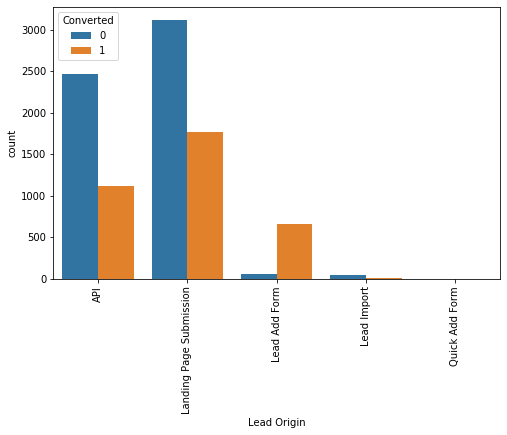

In [17]:
#visualizing count of Variable based on Converted value
plt.figure(figsize=(8,5))
s1=sns.countplot(leads['Lead Origin'], hue=leads.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

Inference : 
API and Landing Page Submission bring higher number of leads as well as conversion.
Lead Add Form has a very high conversion rate but count of leads are not very high.
Lead Import and Quick Add Form get very few leads.
In order to improve overall lead conversion rate, we have to improve lead converion of API and Landing Page Submission and generate more leads from Lead Add Form.

##### 2) Lead Source

In [18]:
#checking the Lead Source value counts 
leads['Lead Source'].value_counts(dropna=False)

Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
NaN                    36
bing                    6
google                  5
Click2call              4
Live Chat               2
Press_Release           2
Social Media            2
welearnblog_Home        1
youtubechannel          1
WeLearn                 1
Pay per Click Ads       1
NC_EDM                  1
blog                    1
testone                 1
Name: Lead Source, dtype: int64

There are so many levels with less than 10 value counts(low frequency values), we can combine these levels to 'Others'.

Value of NaN is 36. It can also be combined with 'Others'. Add 'Facebook' to 'Social Media' and 'google' to 'Google'.

In [19]:
#replacing Nan Values and combining low frequency values
leads['Lead Source'] = leads['Lead Source'].replace(np.nan,'Others')
leads['Lead Source'] = leads['Lead Source'].replace('google','Google')
leads['Lead Source'] = leads['Lead Source'].replace('Facebook','Social Media')
leads['Lead Source'] = leads['Lead Source'].replace(['bing','Click2call','Live Chat', 'Press_Release',
                                                     'youtubechannel','welearnblog_Home',
                                                     'WeLearn','blog','Pay per Click Ads',
                                                    'testone','NC_EDM'] ,'Others')  

In [20]:
#checking the Lead Source counts values
leads['Lead Source'].value_counts(dropna=False)

Google              2873
Direct Traffic      2543
Olark Chat          1755
Organic Search      1154
Reference            534
Welingak Website     142
Referral Sites       125
Social Media          57
Others                57
Name: Lead Source, dtype: int64

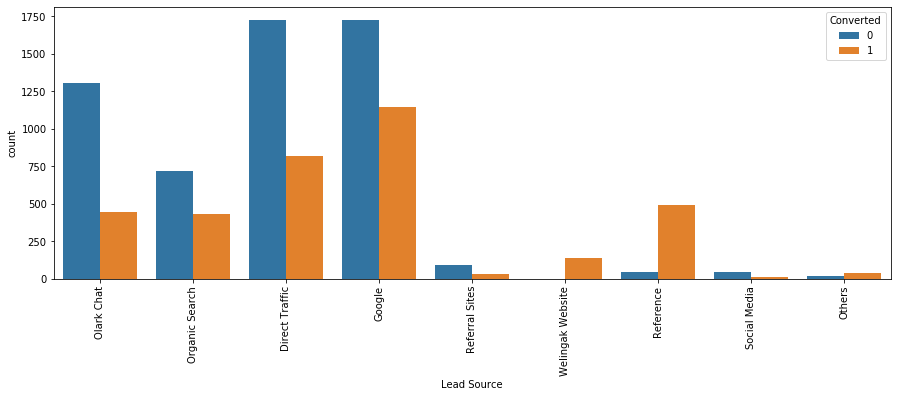

In [21]:
#visualizing count of Variable based on Converted value
plt.figure(figsize=(15,5))
s1=sns.countplot(leads['Lead Source'], hue=leads.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

Inference : 
Maximum number of leads are generated by Google and Direct traffic.
Conversion Rate of reference leads and leads through welingak website is high.
To improve overall lead conversion rate, focus should be on improving lead converion of olark chat, organic search, direct traffic, and google leads and generate more leads from reference and welingak website.

##### 3) Do Not Email

In [22]:
#checking the Do Not Email counts values
leads['Do Not Email'].value_counts(dropna=False)

No     8506
Yes     734
Name: Do Not Email, dtype: int64

Value of 'Do Not Email' is not skewed and this column seems useful

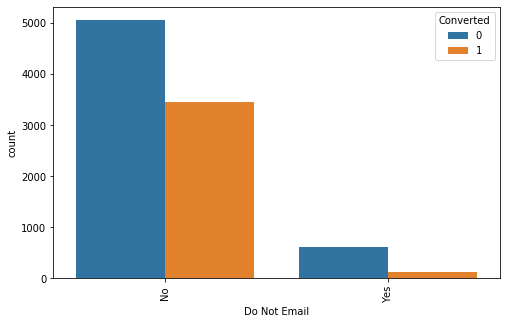

In [23]:
#visualizing count of Variable based on Converted value
plt.figure(figsize=(8,5))
s1=sns.countplot(leads['Do Not Email'], hue=leads.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

Person who choose 'No' in 'Do Not Email' has high conversion rate as it's count is also high compared to people who choose 'Yes'. 

##### 4) Do Not Call

In [24]:
#checking the Do Not Call counts values
leads['Do Not Call'].value_counts(dropna=False)

No     9238
Yes       2
Name: Do Not Call, dtype: int64

In 'Do Not Call' value is skewed with 'No' count at 9238 and 'Yes' at 2. So, we better drop this column, as it won't help in analysis. 

In [25]:
# creating list drop the column
cols_to_drop=['Do Not Call']

##### 5) Converted

In [26]:
#checking the Converted counts values
leads['Converted'].value_counts(dropna=False)

0    5679
1    3561
Name: Converted, dtype: int64

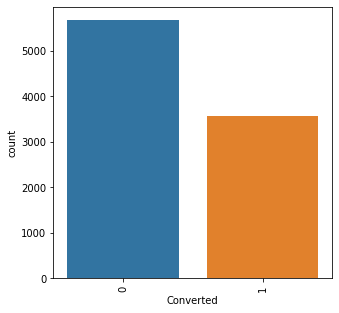

In [27]:
#visualizing count of Variable based on Converted value
plt.figure(figsize=(5,5))
s1=sns.countplot(leads['Converted'])
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

##### 6) Last Activity

In [28]:
#checking the Last Activity counts values
leads['Last Activity'].value_counts(dropna=False)

Email Opened                    3437
SMS Sent                        2745
Olark Chat Conversation          973
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    326
Email Link Clicked               267
Form Submitted on Website        116
NaN                              103
Unreachable                       93
Unsubscribed                      61
Had a Phone Conversation          30
Approached upfront                 9
View in browser link Clicked       6
Email Received                     2
Email Marked Spam                  2
Resubscribed to emails             1
Visited Booth in Tradeshow         1
Name: Last Activity, dtype: int64

Percentage of Null value in 'Last Activity' is 1.11%. It is very less and we can easily impute it with Mode imputation and convert NaN to Email Opened as it's vale is high.

In [29]:
# convert NaN to Email Opened (mode imputation)

leads['Last Activity'] = leads['Last Activity'].replace(np.nan, 'Email Opened')

In [30]:
#checking the Last Activity counts values
leads['Last Activity'].value_counts(dropna=False)

Email Opened                    3540
SMS Sent                        2745
Olark Chat Conversation          973
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    326
Email Link Clicked               267
Form Submitted on Website        116
Unreachable                       93
Unsubscribed                      61
Had a Phone Conversation          30
Approached upfront                 9
View in browser link Clicked       6
Email Marked Spam                  2
Email Received                     2
Resubscribed to emails             1
Visited Booth in Tradeshow         1
Name: Last Activity, dtype: int64

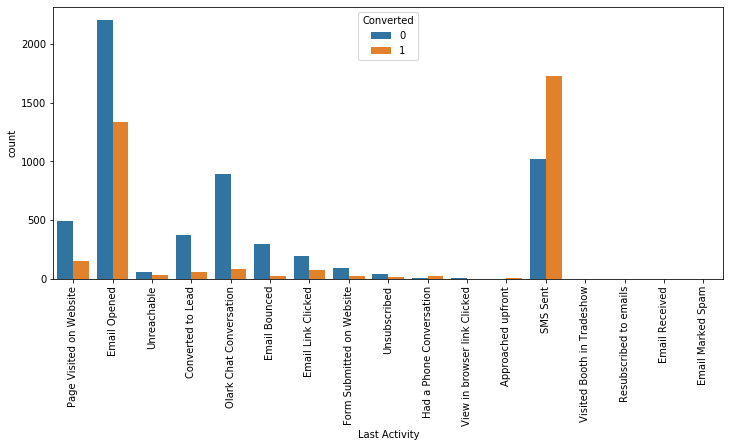

In [31]:
#visualizing count of Variable based on Converted value
plt.figure(figsize=(12,5))
s1=sns.countplot(leads['Last Activity'], hue=leads.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

Here we can see that 'Email Opened' and 'SMS sent' converts most number of leads. Count of lead conversion in 'SMS sent' is very high.

##### 7) Country

In [32]:
#checking the Country counts values
leads['Country'].value_counts(dropna=False)

India                   6492
NaN                     2461
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Hong Kong                  7
Bahrain                    7
Oman                       6
France                     6
unknown                    5
Nigeria                    4
South Africa               4
Kuwait                     4
Germany                    4
Canada                     4
Sweden                     3
Netherlands                2
Asia/Pacific Region        2
Belgium                    2
Bangladesh                 2
Uganda                     2
China                      2
Philippines                2
Italy                      2
Ghana                      2
Russia                     1
Tanzania                   1
Vietnam                    1
Malaysia                   1
Sri Lanka                  1
Switzerland   

In [33]:
# Since India is the most common occurence among the non-missing values we can impute all missing values with India
leads['Country']=leads['Country'].replace(np.nan,'India')

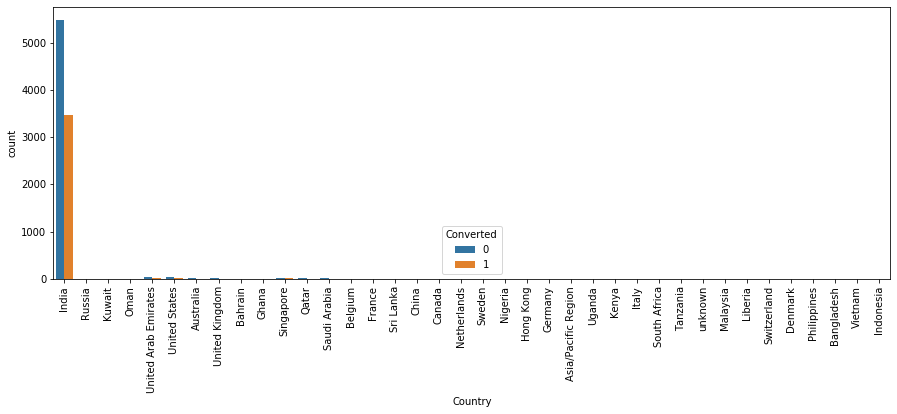

In [34]:
#plotting spread of Country columnn after replacing NaN values

plt.figure(figsize=(15,5))
s1=sns.countplot(leads.Country, hue=leads.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

 As we can see the Number of Values for India are quite high (nearly 97% of the Data),so, here value is skewed. This column can be dropped

In [35]:
#Here again we have another Column that is worth Dropping. So we Append to the cols_to_drop List
cols_to_drop.append('Country')
cols_to_drop

['Do Not Call', 'Country']

##### 8) Specialization

In [36]:
#checking the Specialization counts values
leads['Specialization'].value_counts(dropna=False)

NaN                                  3380
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Travel and Tourism                    203
Media and Advertising                 203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

In [37]:
# Lead may not have mentioned specialization because it was not in the list or maybe they are a students 
# and don't have a specialization yet. So we will replace NaN values here with 'Not Specified'

leads['Specialization'] = leads['Specialization'].replace(np.nan, 'Not Specified')

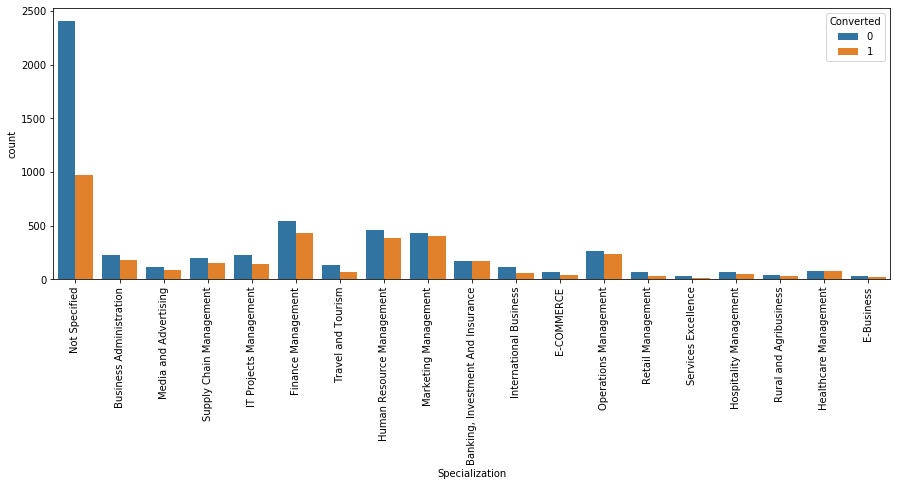

In [38]:
#plotting spread of Specialization columnn 

plt.figure(figsize=(15,5))
s1=sns.countplot(leads.Specialization, hue=leads.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

We see that specialization with Management in them have higher number of leads as well as leads converted. 
So this is definitely a significant variable and should not be dropped.

In [39]:
#combining Management Specializations because they show similar trends
leads['Specialization'] = leads['Specialization'].replace(['Finance Management','Human Resource Management',
                                                           'Marketing Management','Operations Management',
                                                           'IT Projects Management','Supply Chain Management',
                                                    'Healthcare Management','Hospitality Management',
                                                           'Retail Management'] ,'Management_Specializations') 

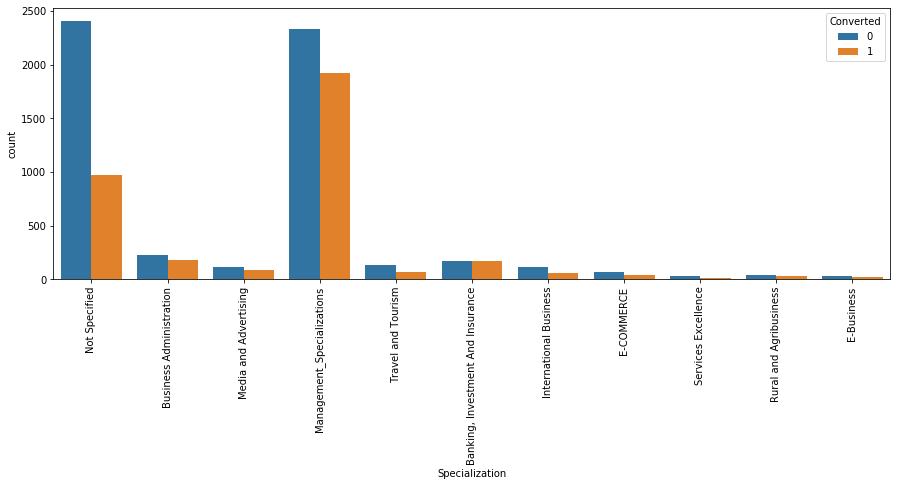

In [40]:
#visualizing count of Variable based on Converted value

plt.figure(figsize=(15,5))
s1=sns.countplot(leads.Specialization, hue=leads.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

Here, management_specilizations converts most number of Leads, followed by not specified.

##### 9) How did you hear about X Education

In [41]:
#checking the How did you hear about X Education counts values
leads['How did you hear about X Education'].value_counts(dropna=False)

NaN                      7250
Online Search             808
Word Of Mouth             348
Student of SomeSchool     310
Other                     186
Multiple Sources          152
Advertisements             70
Social Media               67
Email                      26
SMS                        23
Name: How did you hear about X Education, dtype: int64

In [42]:
# there are 78% missing values in this column, so we can drop this column

cols_to_drop.append('How did you hear about X Education')
cols_to_drop

['Do Not Call', 'Country', 'How did you hear about X Education']

##### 10) What is your current occupation

In [43]:
#checking the What is your current occupation counts values
leads['What is your current occupation'].value_counts(dropna=False)

Unemployed              5600
NaN                     2690
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

There are to total 29% missing values. It may have happened because they might be unemployed, so, they didn't select any value. Let's do MODE imputation here.

In [44]:
#imputing Nan values with mode "Unemployed"

leads['What is your current occupation'] = leads['What is your current occupation'].replace(np.nan, 'Unemployed')

In [45]:
#checking count of values
leads['What is your current occupation'].value_counts(dropna=False)

Unemployed              8290
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

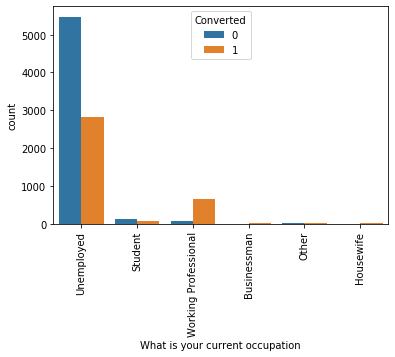

In [46]:
#visualizing count of Variable based on Converted value

s1=sns.countplot(leads['What is your current occupation'], hue=leads.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

Working Professionals going for the course have high chances of joining it.
Unemployed leads are the most in terms of Absolute numbers.

##### 11) What matters most to you in choosing a course

In [47]:
#checking the What matters most to you in choosing a course counts values
leads['What matters most to you in choosing a course'].value_counts(dropna=False)

Better Career Prospects      6528
NaN                          2709
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

In [48]:
#replacing Nan values with Mode "Better Career Prospects"

leads['What matters most to you in choosing a course'] = leads['What matters most to you in choosing a course'].replace(np.nan,'Better Career Prospects')

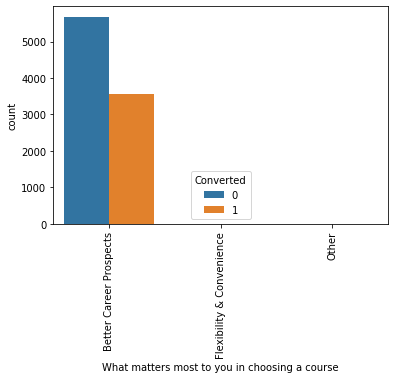

In [49]:
#visualizing count of Variable based on Converted value

s1=sns.countplot(leads['What matters most to you in choosing a course'], hue=leads.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

In [50]:
#checking the What matters most to you in choosing a course counts values
leads['What matters most to you in choosing a course'].value_counts(dropna=False)

Better Career Prospects      9237
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

Here, column is worth dropping, as values are skewed.

In [51]:
#Here again we have another Column that is worth Dropping. So we Append to the cols_to_drop List
cols_to_drop.append('What matters most to you in choosing a course')
cols_to_drop

['Do Not Call',
 'Country',
 'How did you hear about X Education',
 'What matters most to you in choosing a course']

##### 12) Search

In [52]:
#checking the Search counts values
leads['Search'].value_counts(dropna=False)

No     9226
Yes      14
Name: Search, dtype: int64

In [53]:
# It is a skewed data - we must drop it

cols_to_drop.append('Search')
cols_to_drop

['Do Not Call',
 'Country',
 'How did you hear about X Education',
 'What matters most to you in choosing a course',
 'Search']

##### 13) Magazine

In [54]:
#checking the Magazine counts values
leads['Magazine'].value_counts(dropna=False)

No    9240
Name: Magazine, dtype: int64

In [55]:
# It is a skewed data - we must drop it

cols_to_drop.append('Magazine')
cols_to_drop

['Do Not Call',
 'Country',
 'How did you hear about X Education',
 'What matters most to you in choosing a course',
 'Search',
 'Magazine']

##### 14) Newspaper Article

In [56]:
#checking the Newspaper Article counts values
leads['Newspaper Article'].value_counts(dropna=False)

No     9238
Yes       2
Name: Newspaper Article, dtype: int64

In [57]:
# It is a skewed data - we must drop it

cols_to_drop.append('Newspaper Article')
cols_to_drop

['Do Not Call',
 'Country',
 'How did you hear about X Education',
 'What matters most to you in choosing a course',
 'Search',
 'Magazine',
 'Newspaper Article']

##### 15) X Education Forums

In [58]:
#checking the X Education Forums counts values
leads['X Education Forums'].value_counts(dropna=False)

No     9239
Yes       1
Name: X Education Forums, dtype: int64

In [59]:
# It is a skewed data - we must drop it

cols_to_drop.append('X Education Forums')
cols_to_drop

['Do Not Call',
 'Country',
 'How did you hear about X Education',
 'What matters most to you in choosing a course',
 'Search',
 'Magazine',
 'Newspaper Article',
 'X Education Forums']

##### 16) Newspaper

In [60]:
#checking the Newspaper counts values
leads['Newspaper'].value_counts(dropna=False)

No     9239
Yes       1
Name: Newspaper, dtype: int64

In [61]:
# It is a skewed data - we must drop it

cols_to_drop.append('Newspaper')
cols_to_drop

['Do Not Call',
 'Country',
 'How did you hear about X Education',
 'What matters most to you in choosing a course',
 'Search',
 'Magazine',
 'Newspaper Article',
 'X Education Forums',
 'Newspaper']

##### 17) Digital Advertisement

In [62]:
#checking the Digital Advertisement counts values
leads['Digital Advertisement'].value_counts(dropna=False)

No     9236
Yes       4
Name: Digital Advertisement, dtype: int64

In [63]:
# It is a skewed data - we must drop it

cols_to_drop.append('Digital Advertisement')
cols_to_drop

['Do Not Call',
 'Country',
 'How did you hear about X Education',
 'What matters most to you in choosing a course',
 'Search',
 'Magazine',
 'Newspaper Article',
 'X Education Forums',
 'Newspaper',
 'Digital Advertisement']

##### 18) Through Recommendations

In [64]:
#checking the Through Recommendations counts values
leads['Through Recommendations'].value_counts(dropna=False)

No     9233
Yes       7
Name: Through Recommendations, dtype: int64

In [65]:
# It is a skewed data - we must drop it

cols_to_drop.append('Through Recommendations')
cols_to_drop

['Do Not Call',
 'Country',
 'How did you hear about X Education',
 'What matters most to you in choosing a course',
 'Search',
 'Magazine',
 'Newspaper Article',
 'X Education Forums',
 'Newspaper',
 'Digital Advertisement',
 'Through Recommendations']

##### 19) Receive More Updates About Our Courses

In [66]:
#checking the Receive More Updates About Our Courses counts values
leads['Receive More Updates About Our Courses'].value_counts(dropna=False)

No    9240
Name: Receive More Updates About Our Courses, dtype: int64

In [67]:
# It is a skewed data - we must drop it

cols_to_drop.append('Receive More Updates About Our Courses')
cols_to_drop

['Do Not Call',
 'Country',
 'How did you hear about X Education',
 'What matters most to you in choosing a course',
 'Search',
 'Magazine',
 'Newspaper Article',
 'X Education Forums',
 'Newspaper',
 'Digital Advertisement',
 'Through Recommendations',
 'Receive More Updates About Our Courses']

##### 20) Tags

In [68]:
#checking the Tags counts values
leads['Tags'].value_counts(dropna=False)

NaN                                                  3353
Will revert after reading the email                  2072
Ringing                                              1203
Interested in other courses                           513
Already a student                                     465
Closed by Horizzon                                    358
switched off                                          240
Busy                                                  186
Lost to EINS                                          175
Not doing further education                           145
Interested  in full time MBA                          117
Graduation in progress                                111
invalid number                                         83
Diploma holder (Not Eligible)                          63
wrong number given                                     47
opp hangup                                             33
number not provided                                    27
in touch with 

'Tag' contains 36% of missing values. But it is an important feature, which helps in identifying the lead. So, we must convert it's null value to 'Not Specified'.

In [69]:
#replacing Nan values with "Not Specified"
leads['Tags'] = leads['Tags'].replace(np.nan,'Not Specified')

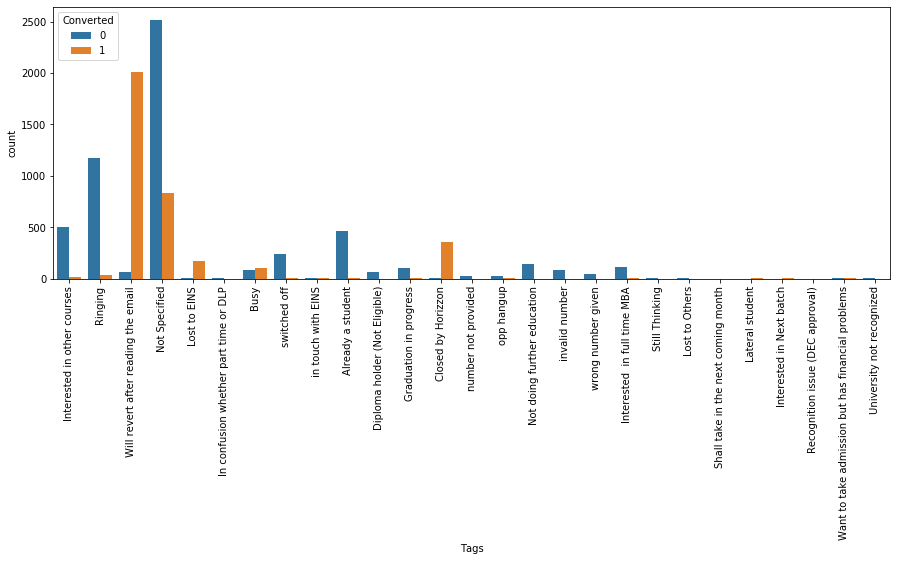

In [70]:
#visualizing count of Variable based on Converted value

plt.figure(figsize=(15,5))
s1=sns.countplot(leads['Tags'], hue=leads.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

Tags such as 'Closed by Horizon', 'Will revert after reading the email' has very high conversion rate followed by 'Not Specified'. There are many other low frequency levels also. We can combine these low frequency levels to form 'Other_Tags'.

In [71]:
#replacing tags with low frequency with "Other Tags"
leads['Tags'] = leads['Tags'].replace(['In confusion whether part time or DLP', 'in touch with EINS','Diploma holder (Not Eligible)',
                                     'Approached upfront','Graduation in progress','number not provided', 'opp hangup','Still Thinking',
                                    'Lost to Others','Shall take in the next coming month','Lateral student','Interested in Next batch',
                                    'Recognition issue (DEC approval)','Want to take admission but has financial problems',
                                    'University not recognized'], 'Other_Tags')

leads['Tags'] = leads['Tags'].replace(['switched off',
                                      'Already a student',
                                       'Not doing further education',
                                       'invalid number',
                                       'wrong number given',
                                       'Interested  in full time MBA'] , 'Other_Tags')

In [72]:
#checking the Tags counts values
leads['Tags'].value_counts(dropna=False)

Not Specified                          3353
Will revert after reading the email    2072
Other_Tags                             1380
Ringing                                1203
Interested in other courses             513
Closed by Horizzon                      358
Busy                                    186
Lost to EINS                            175
Name: Tags, dtype: int64

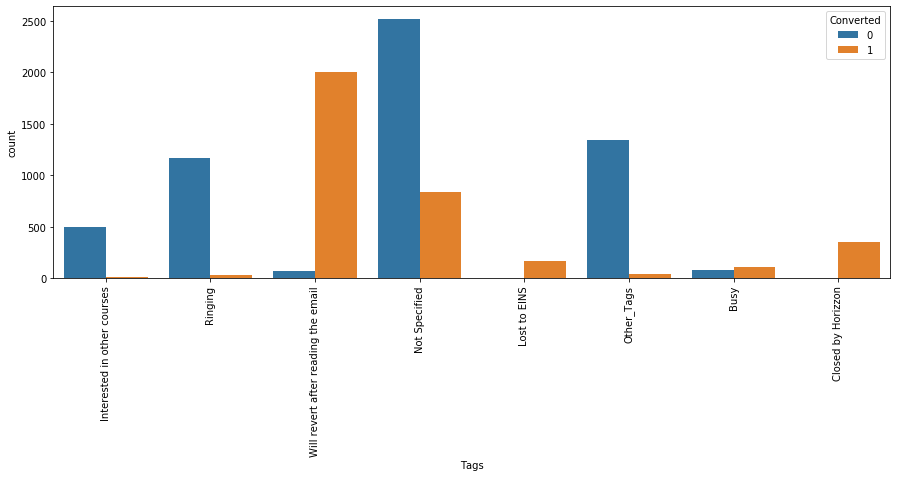

In [73]:
#visualizing count of Variable based on Converted value

plt.figure(figsize=(15,5))
s1=sns.countplot(leads['Tags'], hue=leads.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

Count of 'Will revert after reading the email' is too high followed by 'Closed by Horizon'. 

##### 21) Update me on Supply Chain Content

In [74]:
#checking the Update me on Supply Chain Content counts values
leads['Update me on Supply Chain Content'].value_counts(dropna=False)

No    9240
Name: Update me on Supply Chain Content, dtype: int64

In [75]:
# It is a skewed data - we must drop it

cols_to_drop.append('Update me on Supply Chain Content')
cols_to_drop

['Do Not Call',
 'Country',
 'How did you hear about X Education',
 'What matters most to you in choosing a course',
 'Search',
 'Magazine',
 'Newspaper Article',
 'X Education Forums',
 'Newspaper',
 'Digital Advertisement',
 'Through Recommendations',
 'Receive More Updates About Our Courses',
 'Update me on Supply Chain Content']

##### 22) Get updates on DM Content

In [76]:
#checking the Get updates on DM Content counts values
leads['Get updates on DM Content'].value_counts(dropna=False)

No    9240
Name: Get updates on DM Content, dtype: int64

In [77]:
# It is a skewed data - we must drop it

cols_to_drop.append('Get updates on DM Content')
cols_to_drop

['Do Not Call',
 'Country',
 'How did you hear about X Education',
 'What matters most to you in choosing a course',
 'Search',
 'Magazine',
 'Newspaper Article',
 'X Education Forums',
 'Newspaper',
 'Digital Advertisement',
 'Through Recommendations',
 'Receive More Updates About Our Courses',
 'Update me on Supply Chain Content',
 'Get updates on DM Content']

##### 23) Lead Profile

In [78]:
#checking the Lead Profile counts values
leads['Lead Profile'].value_counts(dropna=False)

NaN                            6855
Potential Lead                 1613
Other Leads                     487
Student of SomeSchool           241
Lateral Student                  24
Dual Specialization Student      20
Name: Lead Profile, dtype: int64

In [79]:
# it contains null value of 74%, so we must drop this column

cols_to_drop.append('Lead Profile')
cols_to_drop

['Do Not Call',
 'Country',
 'How did you hear about X Education',
 'What matters most to you in choosing a course',
 'Search',
 'Magazine',
 'Newspaper Article',
 'X Education Forums',
 'Newspaper',
 'Digital Advertisement',
 'Through Recommendations',
 'Receive More Updates About Our Courses',
 'Update me on Supply Chain Content',
 'Get updates on DM Content',
 'Lead Profile']

##### 24) City

In [80]:
#checking the City counts values
leads['City'].value_counts(dropna=False)

NaN                            3669
Mumbai                         3222
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: City, dtype: int64

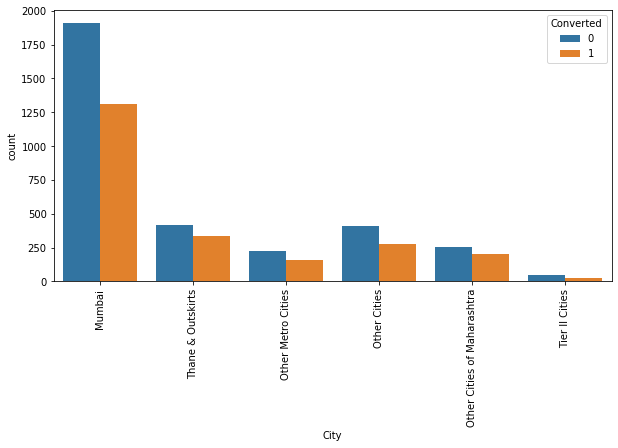

In [81]:
#plotting spread of City columnn after replacing NaN values

plt.figure(figsize=(10,5))
s1=sns.countplot(leads.City, hue=leads.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

City has got 39% misssing value and most of the data present is skewed to Mumbai. 

This dataset contains the data from allover India. But most of the levels in the City columns has cities of Maharashtra only, that too with Mumbai being high.

So there is not a fine balance in the distribution of values in this column. Here Mode imputation won't be logical for missing values.

So, we better drop this column, as we can't develop reliable model using this feature.

In [82]:
#  We can drop this column also 

cols_to_drop.append('City')
cols_to_drop

['Do Not Call',
 'Country',
 'How did you hear about X Education',
 'What matters most to you in choosing a course',
 'Search',
 'Magazine',
 'Newspaper Article',
 'X Education Forums',
 'Newspaper',
 'Digital Advertisement',
 'Through Recommendations',
 'Receive More Updates About Our Courses',
 'Update me on Supply Chain Content',
 'Get updates on DM Content',
 'Lead Profile',
 'City']

##### 25) I agree to pay the amount through cheque

In [83]:
#checking the I agree to pay the amount through cheque counts values
leads['I agree to pay the amount through cheque'].value_counts(dropna=False)

No    9240
Name: I agree to pay the amount through cheque, dtype: int64

In [84]:
# skewed data it is, we must drop it

cols_to_drop.append('I agree to pay the amount through cheque')
cols_to_drop

['Do Not Call',
 'Country',
 'How did you hear about X Education',
 'What matters most to you in choosing a course',
 'Search',
 'Magazine',
 'Newspaper Article',
 'X Education Forums',
 'Newspaper',
 'Digital Advertisement',
 'Through Recommendations',
 'Receive More Updates About Our Courses',
 'Update me on Supply Chain Content',
 'Get updates on DM Content',
 'Lead Profile',
 'City',
 'I agree to pay the amount through cheque']

##### 26) A free copy of Mastering The Interview

In [85]:
#checking the I agree to pay the amount through cheque counts values
leads['A free copy of Mastering The Interview'].value_counts(dropna=False)

No     6352
Yes    2888
Name: A free copy of Mastering The Interview, dtype: int64

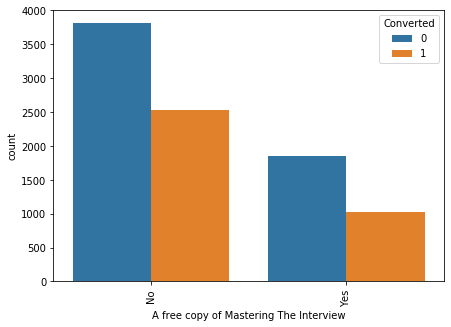

In [86]:
#plotting spread of City columnn after replacing NaN values

plt.figure(figsize=(7,5))
s1=sns.countplot(leads["A free copy of Mastering The Interview"], hue=leads.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

Here also, conversion rate is high with No as the reply.

##### 27) Last Notable Activity

In [87]:
#checking the Last Notable Activity counts values
leads['Last Notable Activity'].value_counts(dropna=False)

Modified                        3407
Email Opened                    2827
SMS Sent                        2172
Page Visited on Website          318
Olark Chat Conversation          183
Email Link Clicked               173
Email Bounced                     60
Unsubscribed                      47
Unreachable                       32
Had a Phone Conversation          14
Email Marked Spam                  2
Approached upfront                 1
Form Submitted on Website          1
Email Received                     1
View in browser link Clicked       1
Resubscribed to emails             1
Name: Last Notable Activity, dtype: int64

There are may levels with very low count. We must combine these low frequeny values to 'Other_Notable_activity'

In [88]:
#clubbing lower frequency values

leads['Last Notable Activity'] = leads['Last Notable Activity'].replace(['Had a Phone Conversation',
                                                                       'Email Marked Spam',
                                                                         'Unreachable',
                                                                         'Unsubscribed',
                                                                         'Email Bounced',                                                                    
                                                                       'Resubscribed to emails',
                                                                       'View in browser link Clicked',
                                                                       'Approached upfront', 
                                                                       'Form Submitted on Website', 
                                                                       'Email Received'],'Other_Notable_activity')

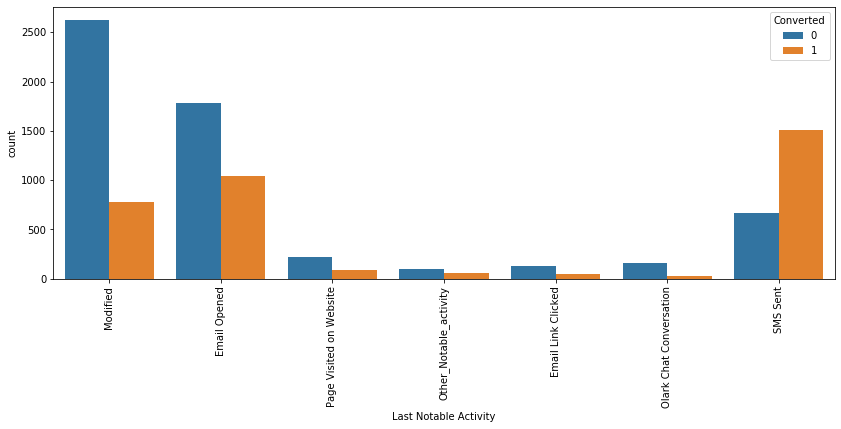

In [89]:
#visualizing count of Variable based on Converted value

plt.figure(figsize = (14,5))
ax1=sns.countplot(x = "Last Notable Activity", hue = "Converted", data = leads)
ax1.set_xticklabels(ax1.get_xticklabels(),rotation=90)
plt.show()

In [90]:
#checking value counts for variable

leads['Last Notable Activity'].value_counts()

Modified                   3407
Email Opened               2827
SMS Sent                   2172
Page Visited on Website     318
Olark Chat Conversation     183
Email Link Clicked          173
Other_Notable_activity      160
Name: Last Notable Activity, dtype: int64

Here 'SMS Sent' as last notable activity has high count with positive conversion rate, followed by Email opened and Modified. 

In [91]:
# We have treated all the categorical column.
# Now, let's check the number of missing values from each column.

round((leads.isnull().sum()/len(leads))*100,2)

Prospect ID                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.00
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     0.00
Country                                           0.00
Specialization                                    0.00
How did you hear about X Education               78.46
What is your current occupation                   0.00
What matters most to you in choosing a course     0.00
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Educatio

"How did you hear about X Education", "Lead Profile", "City" has high null value percentage. We can drop these columns.

In [92]:
# check columns to drop
cols_to_drop

['Do Not Call',
 'Country',
 'How did you hear about X Education',
 'What matters most to you in choosing a course',
 'Search',
 'Magazine',
 'Newspaper Article',
 'X Education Forums',
 'Newspaper',
 'Digital Advertisement',
 'Through Recommendations',
 'Receive More Updates About Our Courses',
 'Update me on Supply Chain Content',
 'Get updates on DM Content',
 'Lead Profile',
 'City',
 'I agree to pay the amount through cheque']

In [93]:
# We will drop total 17 columns now, which consists of columns with high missing values as well as highly Skewed data.

#dropping columns
leads = leads.drop(cols_to_drop,1)

In [94]:
round((leads.isnull().sum()/len(leads))*100,2)

Prospect ID                               0.00
Lead Origin                               0.00
Lead Source                               0.00
Do Not Email                              0.00
Converted                                 0.00
TotalVisits                               1.48
Total Time Spent on Website               0.00
Page Views Per Visit                      1.48
Last Activity                             0.00
Specialization                            0.00
What is your current occupation           0.00
Tags                                      0.00
A free copy of Mastering The Interview    0.00
Last Notable Activity                     0.00
dtype: float64

In [95]:
# Check rows and columns of the dataset after cleaning.

leads.shape

(9240, 14)

"TotalVisits" and "Page Views Per Visit" still has missing values but it's count is very low(1.48%).

So, we can drop the rows with missing values and it won't even affect the dataset.

In [96]:
#Drop all rows which have Nan Values. it will not affect the model
leads = leads.dropna()

In [97]:
# Checkinh the number of rows again

leads.shape

(9103, 14)

We have lost around 137 rows.

In [98]:
# Checking the percentage of missing values again

round((leads.isnull().sum()/len(leads))*100,2)

Prospect ID                               0.0
Lead Origin                               0.0
Lead Source                               0.0
Do Not Email                              0.0
Converted                                 0.0
TotalVisits                               0.0
Total Time Spent on Website               0.0
Page Views Per Visit                      0.0
Last Activity                             0.0
Specialization                            0.0
What is your current occupation           0.0
Tags                                      0.0
A free copy of Mastering The Interview    0.0
Last Notable Activity                     0.0
dtype: float64

In [99]:
# Checking datatypes and no. of enteries.
leads.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9103 entries, 0 to 9239
Data columns (total 14 columns):
Prospect ID                               9103 non-null object
Lead Origin                               9103 non-null object
Lead Source                               9103 non-null object
Do Not Email                              9103 non-null object
Converted                                 9103 non-null int64
TotalVisits                               9103 non-null float64
Total Time Spent on Website               9103 non-null int64
Page Views Per Visit                      9103 non-null float64
Last Activity                             9103 non-null object
Specialization                            9103 non-null object
What is your current occupation           9103 non-null object
Tags                                      9103 non-null object
A free copy of Mastering The Interview    9103 non-null object
Last Notable Activity                     9103 non-null object
dtypes: flo

Now, our dataset is clean with 9103 rows and 14 columns with no missing values and the datatypes of the feature variables are also as required.

Now we can breifly do some Numerical analysis.

### NUMERICAL ANALYSIS

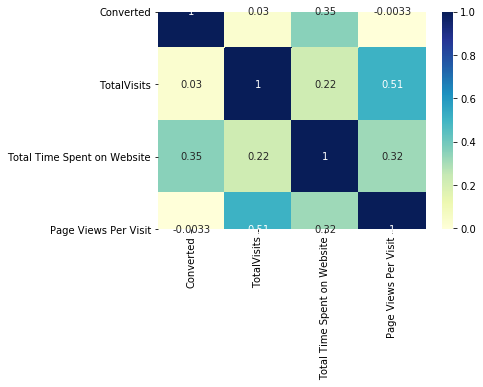

In [100]:
#checking the correlation between the numerical values
#num_list = ['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']
sns.heatmap(leads.corr(), cmap="YlGnBu", annot = True)
plt.show()

Numerical variables are not highly correlated.

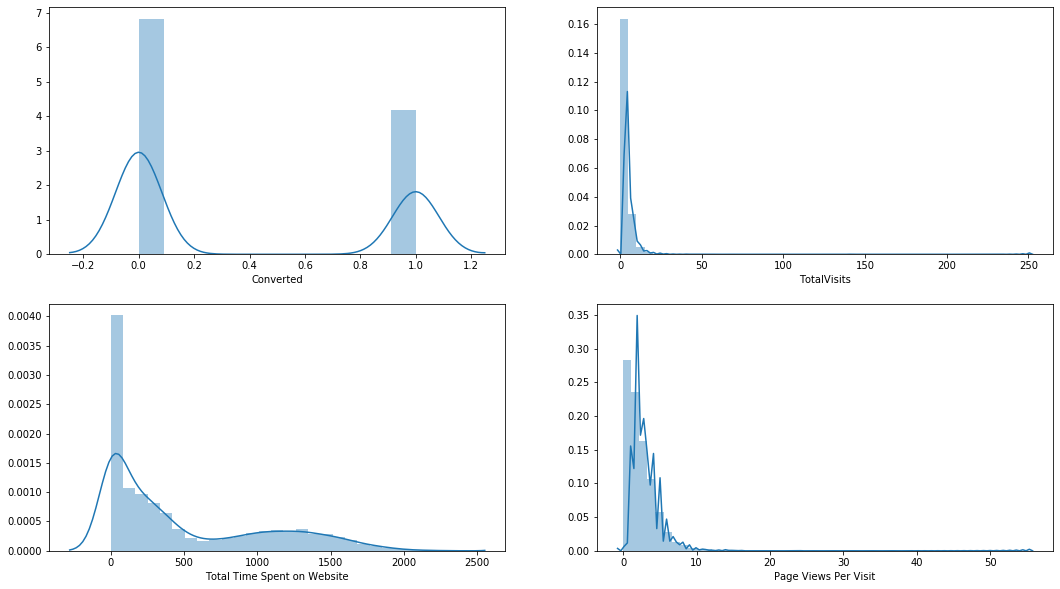

In [101]:
# Let's check how data is distributed with the help of histogram

plt.figure(figsize=(18,10))
feature = ['Converted', 'TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']
for i in enumerate(feature):
    plt.subplot(2,2,i[0]+1)
    sns.distplot(leads[i[1]])

Count of "TotalVisits" is maximum around 0 to 25.

Count of "Total Time Spent on Website" is maximum around 0 to 500.

Count of "Page Views Per Visit" is maximum around 0 to 10.

Numerical variabes might also contains few outliers, let's check and treat them, as having outliers in the data might affect the analysis.

##### CHECKING AND TREATING OUTLIERS

In [102]:
# Checking for outliers in the continuous variables
num_leads = leads[['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']]
num_leads.describe(percentiles=[.25,.50,.75,.95,.99,1])

,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9103.000000,9103.000000,9103.000000
mean,3.445238,481.350104,2.362820
std,4.854853,545.066142,2.161418
min,0.000000,0.000000,0.000000
25%,1.000000,9.000000,1.000000
50%,3.000000,244.000000,2.000000
75%,5.000000,919.500000,3.000000
95%,10.000000,1556.900000,6.000000
99%,17.000000,1838.960000,9.000000
100%,251.000000,2272.000000,55.000000


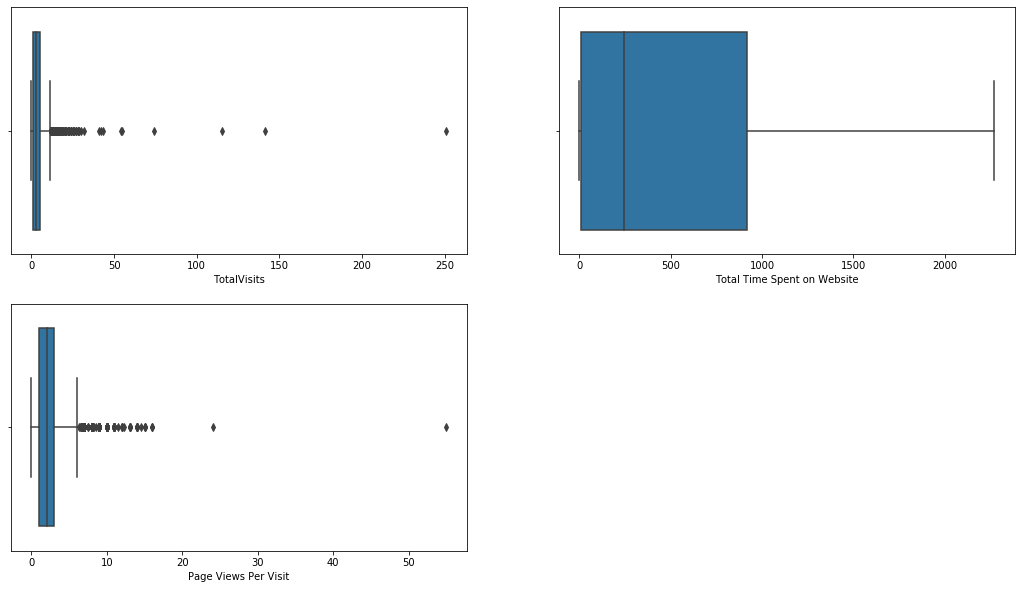

In [103]:
# BOXPLOT

# Let's check the boxplot for the outliers

plt.figure(figsize=(18,10))
feature = ['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']
for i in enumerate(feature):
    plt.subplot(2,2,i[0]+1)
    sns.boxplot(leads[i[1]])

It is clear from the BOXPLOT that 'TotalVisits' and 'Page Views Per Visit' contains few outliers.

Let's cap the outliers.

In [104]:
# assigning variables for capping

a_1 = leads['TotalVisits'].quantile(0.99)
b_2 = leads['Page Views Per Visit'].quantile(0.99)

In [105]:
# capping the outliers

leads['TotalVisits'][leads['TotalVisits']>=a_1] = a_1
leads['Page Views Per Visit'][leads['Page Views Per Visit']>=b_2] = b_2

We have capped those outliers which are above 99th quantile.

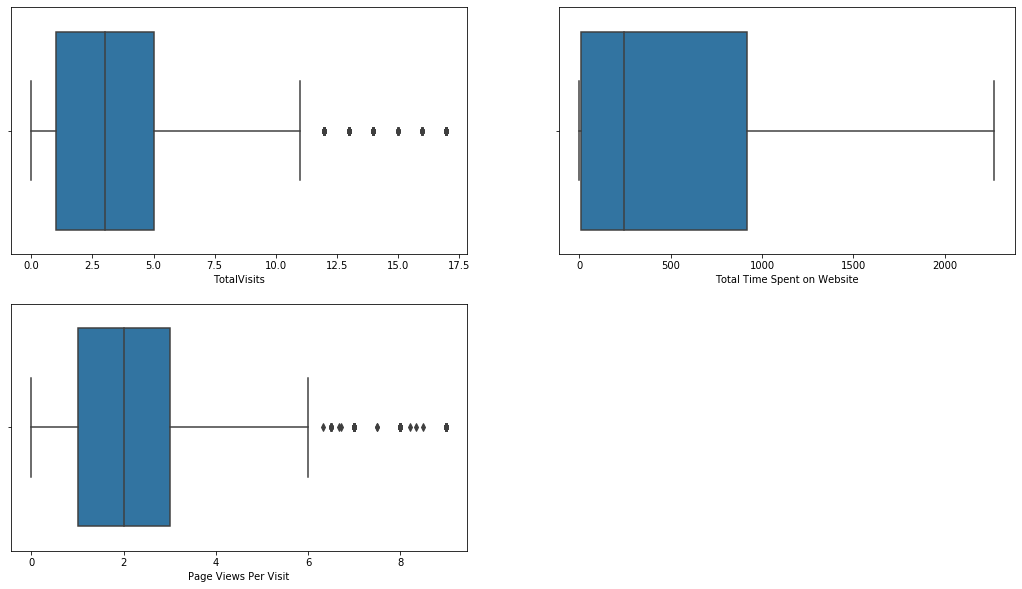

In [106]:
# BOXPLOT

# Let's check the boxplot for the outliers after capping

plt.figure(figsize=(18,10))
feature = ['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']
for i in enumerate(feature):
    plt.subplot(2,2,i[0]+1)
    sns.boxplot(leads[i[1]])

Rest of the values in 'TotalVisits' and 'Page Views Per Visit' seems logical. We do not need to treat them.

Now out dataset is completely clean. 

We can go ahead and prepare data for building the model.

### DATA PREPARATION
##### Converting some binary variables (Yes/No) to 0/1

Two features in the dataset 'Do Not Email' and 'A free copy of Mastering The Interview' contains values in Yes, No. 

We need to convert "Yes" to 1 and "No" to 0.

In [107]:
# List of variables to map

varlist = ['Do Not Email', 'A free copy of Mastering The Interview']

# Defining the map function
def binary_map(x):
    return x.map({'Yes':1, 'No':0})

# Applying the function to the features
leads[varlist] = leads[varlist].apply(binary_map)

In [108]:
# reading dataset after converting 'Yes' to 1 and 'No' to 0

leads.head()

,Prospect ID,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,Tags,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,API,Olark Chat,0,0,0.0,0,0.0,Page Visited on Website,Not Specified,Unemployed,Interested in other courses,0,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,API,Organic Search,0,0,5.0,674,2.5,Email Opened,Not Specified,Unemployed,Ringing,0,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,Landing Page Submission,Direct Traffic,0,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Will revert after reading the email,1,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,Landing Page Submission,Direct Traffic,0,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,Ringing,0,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,Landing Page Submission,Google,0,1,2.0,1428,1.0,Converted to Lead,Not Specified,Unemployed,Will revert after reading the email,0,Modified


#### For categorical variables with multiple levels, create dummy features (one-hot encoded)

In every categorical variable we have got more than 3 level of values.

In [109]:
# Creating dummy variables for the categorical variables and dropping the 1 level from each.

# Creating dummy variables for the variable 'Lead Origin'
lo = pd.get_dummies(leads['Lead Origin'], prefix = 'Lead Origin')
# Dropping Lead Origin_Lead Import
lo1 = lo.drop(['Lead Origin_Lead Import'], 1)
#Adding the results to the master dataframe
leads = pd.concat([leads, lo1], axis=1)

# Creating dummy variables for the variable 'Lead Source'
ls = pd.get_dummies(leads['Lead Source'], prefix = 'Lead Source')
# Dropping Lead Source_Others
ls1 = ls.drop(['Lead Source_Others'], 1)
#Adding the results to the master dataframe
leads = pd.concat([leads, ls1], axis=1)

# Creating dummy variables for the variable 'Last Activity'
la = pd.get_dummies(leads['Last Activity'], prefix = 'Last Activity')
# Dropping Last Activity_Unreachable
la1 = la.drop(['Last Activity_Unreachable'], 1)
#Adding the results to the master dataframe
leads = pd.concat([leads, la1], axis=1)

# Creating dummy variables for the variable 'Specialization'
sp = pd.get_dummies(leads['Specialization'], prefix = 'Specialization')
# Dropping Specialization_Not Specified
sp1 = sp.drop(['Specialization_Not Specified'], 1)
#Adding the results to the master dataframe
leads = pd.concat([leads, sp1], axis=1)

# Creating dummy variables for the variable 'What is your current occupation'
co = pd.get_dummies(leads['What is your current occupation'], prefix = 'What is your current occupation')
# Dropping What is your current occupation_Other
co1 = co.drop(['What is your current occupation_Other'], 1)
#Adding the results to the master dataframe
leads = pd.concat([leads, co1], axis=1)

# Creating dummy variables for the variable 'Tags'
tg = pd.get_dummies(leads['Tags'], prefix = 'Tags')
# Dropping Tags_Not Specified
tg1 = tg.drop(['Tags_Not Specified'], 1)
#Adding the results to the master dataframe
leads = pd.concat([leads, tg1], axis=1)

# Creating dummy variables for the variable 'Last Notable Activity'
lna = pd.get_dummies(leads['Last Notable Activity'], prefix = 'Last Notable Activity')
# Dropping Last Notable Activity_Other_Notable_activity
lna1 = lna.drop(['Last Notable Activity_Other_Notable_activity'], 1)
#Adding the results to the master dataframe
leads = pd.concat([leads, lna1], axis=1)

In [110]:
# checking head after creating dummy variables

leads.head()

,Prospect ID,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,Tags,A free copy of Mastering The Interview,Last Notable Activity,Lead Origin_API,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Source_Direct Traffic,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_Welingak Website,Last Activity_Approached upfront,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,"Specialization_Banking, Investment And Insurance",Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_International Business,Specialization_Management_Specializations,Specialization_Media and Advertising,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Travel and Tourism,What is your current occupation_Businessman,What is your current occupation_Housewife,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Tags_Busy,Tags_Closed by Horizzon,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Other_Tags,Tags_Ringing,Tags_Will revert after reading the email,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,API,Olark Chat,0,0,0.0,0,0.0,Page Visited on Website,Not Specified,Unemployed,Interested in other courses,0,Modified,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0
1,2a272436-5132-4136-86fa-dcc88c88f482,API,Organic Search,0,0,5.0,674,2.5,Email Opened,Not Specified,Unemployed,Ringing,0,Email Opened,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,Landing Page Submission,Direct Traffic,0,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Will revert after reading the email,1,Email Opened,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,Landing Page Submission,Direct Traffic,0,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,Ringing,0,Modified,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0
4,3256f628-e534-4826-9d63-4a8b88782852,Landing Page Submission,Google,0,1,2.0,1428,1.0,Converted to Lead,Not Specified,Unemployed,Will revert after reading the email,0,Modified,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0


In [111]:
# checking shape after creating dummy variables

leads.shape

(9103, 69)

After creating dummy variables we have 69 columns.

From these 69 columns we need to drop 7 columns for which we have created dummy variables.

In [112]:
# Drop repeated values--We have created dummies for the below variables, so we can drop them

leads = leads.drop(['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization', 'What is your current occupation', 'Tags', 'Last Notable Activity'], 1)

In [113]:
# checking shape after dropping repeated variables

leads.shape

(9103, 62)

Now, we have total 9103 rows and 62 columns.

We are good to go for Train-Test Split.

### TRAIN-TEST SPLIT

Dataset will be splitted into 2 subsets - Train_set with 70% data and Test_set with 30% data.

In [114]:
# import train_test_split

from sklearn.model_selection import train_test_split

In [115]:
# putting feature variable to X axis(it contains of independent variables)

X = leads.drop(['Converted', 'Prospect ID'], axis=1)
X.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_API,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Source_Direct Traffic,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_Welingak Website,Last Activity_Approached upfront,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,"Specialization_Banking, Investment And Insurance",Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_International Business,Specialization_Management_Specializations,Specialization_Media and Advertising,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Travel and Tourism,What is your current occupation_Businessman,What is your current occupation_Housewife,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Tags_Busy,Tags_Closed by Horizzon,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Other_Tags,Tags_Ringing,Tags_Will revert after reading the email,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent
0,0,0.0,0,0.0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0
1,0,5.0,674,2.5,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0
2,0,2.0,1532,2.0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0
3,0,1.0,305,1.0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0
4,0,2.0,1428,1.0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0


In [116]:
# putting response variable to y (here "Converted" is the target variable)

y = leads['Converted']

y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [117]:
# Splitting the data into train and test

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

### FEATURE SCALING

It done so that the variance of the features are in the same range.

In [118]:
# Importing StandardScaler

from sklearn.preprocessing import StandardScaler

In [119]:
# Scaling the numerical variables

scaler = StandardScaler()

X_train[['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']] = scaler.fit_transform(X_train[['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']])
X_train.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_API,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Source_Direct Traffic,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_Welingak Website,Last Activity_Approached upfront,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,"Specialization_Banking, Investment And Insurance",Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_International Business,Specialization_Management_Specializations,Specialization_Media and Advertising,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Travel and Tourism,What is your current occupation_Businessman,What is your current occupation_Housewife,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Tags_Busy,Tags_Closed by Horizzon,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Other_Tags,Tags_Ringing,Tags_Will revert after reading the email,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent
7962,0,-0.105932,1.476324,-0.420056,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1
5520,0,1.113025,-0.771066,2.354047,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0
1962,0,0.503547,-0.571257,0.084327,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0
1566,0,3.246199,1.393834,0.588709,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0
9170,0,-1.020149,-0.881052,-1.176630,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0


In [120]:
## checking the converted rate

converted = (sum(leads['Converted'])/len(leads['Converted'].index))*100
converted

38.02043282434362

After checking the rate of converted leads in the dataset that we have cleaned, we find it around 38%, which is very close to 30% as mentioned in the problem statement.

### CHECKING CORRELATIONS

Correlation is a problem, because independent variables should be independent.

If the degree of correlation between variables is high enough, it can cause problems when we fit the model and interpret the results.

In [121]:
# Let's check the correlation matrix

leads.corr()

,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_API,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Source_Direct Traffic,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_Welingak Website,Last Activity_Approached upfront,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,"Specialization_Banking, Investment And Insurance",Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_International Business,Specialization_Management_Specializations,Specialization_Media and Advertising,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Travel and Tourism,What is your current occupation_Businessman,What is your current occupation_Housewife,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Tags_Busy,Tags_Closed by Horizzon,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Other_Tags,Tags_Ringing,Tags_Will revert after reading the email,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent
Do Not Email,1.000000,-0.136553,0.009000,-0.047943,0.023986,0.056098,-0.085264,0.096400,-0.021721,0.110165,-0.072073,-0.051918,0.034433,-0.036293,-0.010263,-0.017731,0.002542,-0.006891,-0.063374,0.616344,-0.043879,0.050431,-0.221404,-0.004358,-0.018917,-0.007668,-0.055620,0.082735,-0.003081,-0.017498,0.264492,-0.007549,-0.003081,-0.020797,0.004494,0.012695,0.030230,0.002954,0.003777,-0.000182,0.028196,0.054132,0.060457,-0.008718,-0.009247,0.006908,0.040466,-0.047911,-0.016441,-0.047546,-0.027360,-0.031993,0.111468,-0.019960,-0.097307,-0.037940,-0.190266,0.120103,-0.013176,0.050213,-0.026432
Converted,-0.136553,1.000000,0.045254,0.354939,-0.002854,-0.033079,-0.113685,-0.040698,0.306224,-0.075079,0.026621,-0.125395,-0.001874,0.254067,-0.032135,-0.009589,0.149250,0.029931,-0.116238,-0.127649,-0.038243,0.018927,-0.025097,0.018927,-0.032491,0.045382,-0.209246,-0.081726,0.013383,0.338020,-0.019950,-0.011297,-0.008209,0.044030,0.025754,-0.001927,-0.006604,-0.008079,0.129196,0.011059,0.008234,-0.014398,-0.008912,0.014956,0.040166,-0.005620,-0.280294,0.315113,0.055591,0.233576,-0.177806,0.171081,-0.306172,-0.280750,0.653046,-0.034432,-0.015081,-0.264267,-0.071874,-0.034393,0.362200
TotalVisits,0.009000,0.045254,1.000000,0.329979,0.706151,0.280874,-0.283926,0.410579,-0.251692,0.118481,0.178281,-0.448118,0.289134,-0.213092,0.086613,-0.052258,-0.114861,-0.005282,-0.097725,-0.063833,-0.029196,0.003041,0.048589,0.009879,0.021502,0.028193,-0.197138,0.247729,-0.010741,0.007140,0.007329,0.027643,0.002150,0.076344,0.064552,0.026563,0.038184,0.054074,0.209029,0.065992,0.048365,0.026397,0.099012,0.017484,-0.008593,-0.030788,0.009587,-0.000506,0.042238,0.024528,-0.007111,0.011734,-0.009851,0.081529,0.046120,-0.010777,0.066890,-0.143137,-0.052679,0.228701,0.006916
Total Time Spent on Website,-0.047943,0.354939,0.329979,1.000000,0.343110,0.179005,-0.195333,0.294515,-0.194106,0.142287,0.216937,-0.376633,0.101911,-0.162064,0.012850,-0.048006,-0.091594,0.016020,-0.008109,-0.036669,-0.039876,0.011999,0.009727,0.014324,0.009570,0.027180,-0.190181,0.031634,-0.009257,0.127009,-0.

Variables like 'Lead Origin_API', 'Lead Origin_Lead Add Form', 'Last Activity_Email Link Clicked', 'Last Activity_Email Opened', 'Last Activity_SMS Sent', 'What is your current occupation_Unemployed' are highly correlated with correlation of more than 80%.

We will drop these variables befor building the model.

In [122]:
# Dropping highly correlated Dummy variables

X_train = X_train.drop(['Lead Origin_API', 'Lead Origin_Lead Add Form', 'Last Activity_Email Link Clicked', 'Last Activity_Email Opened', 'Last Activity_SMS Sent', 'What is your current occupation_Unemployed'], 1)

X_test = X_test.drop(['Lead Origin_API', 'Lead Origin_Lead Add Form', 'Last Activity_Email Link Clicked', 'Last Activity_Email Opened', 'Last Activity_SMS Sent', 'What is your current occupation_Unemployed'], 1)

In [123]:
# Check the final rows and column numbers before building model

X_train.shape

(6372, 54)

In [124]:
# Check the final rows and column numbers before building model

X_test.shape

(2731, 54)

### MODEL BUILDING

#### Let's run first training model

We have 54 columns in X_train and X_test, and 6372 rows in X_train and 2731 rows in X_test.

In [125]:
# importing statsmodels.api

import statsmodels.api as sm

In [126]:
# Logistic regression model

logm1 = sm.GLM(y_train, (sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6372
Model:                            GLM   Df Residuals:                     6317
Model Family:                Binomial   Df Model:                           54
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1217.2
Date:                Mon, 20 Jul 2020   Deviance:                       2434.4
Time:                        21:45:11   Pearson chi2:                 8.41e+03
No. Iterations:                    22                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    1.5400      0.808      1.906      0.057      -0.044       3.124
Do Not Email                                            -0.8373      0.306     -2.735      0.006      -1.437      -0.237
TotalVisits                                              0.3167      0.079      4.007      0.000       0.162       0.472
Total Time Spent on Website                              1.0646      0.063     16.948      0.000       0.941       1.188
Page Views Per Visit                                    -0.2932      0.092     -3.175      0.001      -0.474      -0.112
A free copy of Mastering The Interview                  -0.1226      0.175     -0.702      0.483      -0.465       0.220
Lead Origin_Landing Page Submission                     -0.6118      0.226     -2.708      0.007      -1.055      -0.169
Lead Source_Direct Traffic                              -1.7616      0.658     -2.678      0.007      -3.051      -0.472
Lead Source_Google                                      -1.6709      0.645     -2.591      0.010      -2.935      -0.407
Lead Source_Olark Chat                                  -0.8727      0.648     -1.347      0.178      -2.143       0.397
Lead Source_Organic Search                              -1.6229      0.663     -2.449      0.014      -2.922      -0.324
Lead Source_Reference                                   -0.2906      0.791     -0.367      0.713      -1.842       1.260
Lead Source_Referral Sites                              -2.0367      0.817     -2.494      0.013      -3.637      -0.436
Lead Source_Social Media                                -1.0807      1.012     -1.068      0.285      -3.064       0.902
Lead Source_Welingak Website                             3.5548      0.969      3.667      0.000       1.655       5.455
Last Activity_Approached upfront                        18.7560   3.48e+04      0.001      1.000   -6.83e+04    6.83e+04
Last Activity_Converted to Lead                         -1.2877      0.384     -3.352      0.001      -2.041      -0.535
Last Activity_Email Bounced                             -1.1088      0.556     -1.994      0.046      -2.199      -0.019
Last Activity_Email Marked Spam                         17.6781   7.95e+04      0.000      1.000   -1.56e+05    1.56e+05
Last Activity_Email Received                            18.6317   5.59e+04      0.000      1.000   -1.09e+05     1.1e+05
Last Activity_Form Submitted on Website                 -0.4848      0.525     -0.923      0.356      -1.514       0.544
Last Activity_Had a Phone Conversation                  -1.2818      1.083     -1.184      0.237      -3.404       0.841
Last Activity_Olark Chat Conversation                   -1

We have 54 feature variables with many having high p-value, which makes them insignificant.

We will use Recursive Feature Elimination to drop few insignificant columns and bring down number of columns to 15.

#### Feature selection using RFE

In [127]:
# import LogisticRegression and assigning LogisticRegression() to logreg.

from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [128]:
# importing RFE and taking 15 significant features from X_train and y_train.

from sklearn.feature_selection import RFE
rfe = RFE(logreg, 15)
rfe = rfe.fit(X_train, y_train)

In [129]:
# reading rfe.support_

rfe.support_

array([False, False, False, False, False, False,  True,  True, False,
        True, False,  True, False,  True, False,  True,  True, False,
       False, False, False,  True, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False,  True,  True,  True,
        True,  True,  True, False, False, False, False, False,  True])

In [130]:
# Getting list of X_train columns with their ref.support_ and rfe.ranking_

list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', False, 4),
 ('TotalVisits', False, 23),
 ('Total Time Spent on Website', False, 2),
 ('Page Views Per Visit', False, 22),
 ('A free copy of Mastering The Interview', False, 31),
 ('Lead Origin_Landing Page Submission', False, 8),
 ('Lead Source_Direct Traffic', True, 1),
 ('Lead Source_Google', True, 1),
 ('Lead Source_Olark Chat', False, 19),
 ('Lead Source_Organic Search', True, 1),
 ('Lead Source_Reference', False, 3),
 ('Lead Source_Referral Sites', True, 1),
 ('Lead Source_Social Media', False, 20),
 ('Lead Source_Welingak Website', True, 1),
 ('Last Activity_Approached upfront', False, 28),
 ('Last Activity_Converted to Lead', True, 1),
 ('Last Activity_Email Bounced', True, 1),
 ('Last Activity_Email Marked Spam', False, 39),
 ('Last Activity_Email Received', False, 36),
 ('Last Activity_Form Submitted on Website', False, 17),
 ('Last Activity_Had a Phone Conversation', False, 16),
 ('Last Activity_Olark Chat Conversation', True, 1),
 ('Last Activity_Page Visit

In [131]:
# assigning top 15 columns to col 

col = X_train.columns[rfe.support_]

#### Accessing the model with StatsModels

In [132]:
# Let's again run our train model with variables in col.

X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res=logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6372
Model:                            GLM   Df Residuals:                     6356
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1447.1
Date:                Mon, 20 Jul 2020   Deviance:                       2894.2
Time:                        21:45:14   Pearson chi2:                 9.03e+03
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -1.3383      0.109    -12.295      0.000      -1.552      -1.125
Lead Source_Direct Traffic                  -0.4418      0.146     -3.022      0.003      -0.728      -0.155
Lead Source_Google                           0.0135      0.130      0.104      0.917      -0.242       0.269
Lead Source_Organic Search                   0.0235      0.169      0.139      0.889      -0.307       0.354
Lead Source_Referral Sites                  -0.4407      0.443     -0.995      0.320      -1.309       0.428
Lead Source_Welingak Website                 4.2340      0.740      5.723      0.000       2.784       5.684
Last Activity_Converted to Lead             -1.4014      0.344     -4.078      0.000      -2.075      -0.728
Last Activity_Email Bounced                 -1.6580      0.419     -3.957      0.000      -2.479      -0.837
Last Activity_Olark Chat Conversation       -1.6388      0.216     -7.582      0.000      -2.062      -1.215
Tags_Closed by Horizzon                      6.2444      0.715      8.731      0.000       4.843       7.646
Tags_Interested in other courses            -2.0395      0.349     -5.841      0.000      -2.724      -1.355
Tags_Lost to EINS                            6.1093      0.725      8.422      0.000       4.687       7.531
Tags_Other_Tags                             -2.4463      0.205    -11.957      0.000      -2.847      -2.045
Tags_Ringing                                -3.4412      0.236    -14.598      0.000      -3.903      -2.979
Tags_Will revert after reading the email     4.5891      0.176     26.066      0.000       4.244       4.934
Last Notable Activity_SMS Sent               2.3079      0.117     19.794      0.000       2.079       2.536
============================================================================================================
"""

Here p-values for 'Lead Source_Google', 'Lead Source_Organic Search' are more than 5% followed by 'Lead Source_Referral Sites'.

In [133]:
# Getting the predicted value on the train set

y_train_pred = res.predict(X_train_sm).values.reshape(-1)
y_train_pred[:10]

array([0.18798631, 0.14429098, 0.02250973, 0.96318594, 0.02221398,
       0.20778901, 0.05149258, 0.96318594, 0.72503737, 0.96318594])

###### Creating a dataframe with actual converted flag and predicted probability

In [134]:
# Creating y_train_pred_final dataframe with 'Converted', 'Converted_Prob' and 'Lead ID' as columns. 

y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_Prob':y_train_pred})
y_train_pred_final['Lead ID'] = y_train.index
y_train_pred_final.head()

,Converted,Converted_Prob,Lead ID
0,0,0.187986,7962
1,0,0.144291,5520
2,0,0.022510,1962
3,1,0.963186,1566
4,0,0.022214,9170


##### Creating new column 'Predicted' with 1 if Converted_Prob>0.5 else 0

In [135]:
# Adding 'Predicted' column in y_train_pred_final dataframe.

y_train_pred_final['Predicted'] = y_train_pred_final.Converted_Prob.map(lambda x:1 if x>0.5 else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,Lead ID,Predicted
0,0,0.187986,7962,0
1,0,0.144291,5520,0
2,0,0.022510,1962,0
3,1,0.963186,1566,1
4,0,0.022214,9170,0


Now we have actual converted and Predicted data. We can create confusion metrics.

In [136]:
# Confusion metrix

from sklearn import metrics

confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted)
print(confusion)

[[3790  163]
 [ 337 2082]]


In [137]:
# Predicted     not_converted    converted
# Actual
# not_converted        3790      163
# converted            337       2082

In [138]:
# Check overall accuracy

print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted))

0.9215317011927181


Overall accuract is 92%, which is very high.

Accuracy tells Correctly predicted labels / Total number of labels

At 92% model is predicting very accurately.

###### Checking VIFs

Checking VIF to check if there is multicollinearity and are the variables correlated.

If we get VIF value greater than 5, it shows that the variable is highly correlated and we should drop those.

In [139]:
# Let's check VIF value of the feature variable

from statsmodels.stats.outliers_influence import variance_inflation_factor

In [140]:
# Let's create dataframe that contains feature variable with their VIFs

vif = pd.DataFrame()
vif['features'] = X_train[col].columns
vif['VIF'] =[variance_inflation_factor(X_train[col].values,i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = "VIF", ascending=False)
vif

,features,VIF
6,Last Activity_Email Bounced,1.07
10,Tags_Lost to EINS,1.04
3,Lead Source_Referral Sites,1.03
4,Lead Source_Welingak Website,1.03
8,Tags_Closed by Horizzon,1.03
9,Tags_Interested in other courses,0.38
11,Tags_Other_Tags,0.29
7,Last Activity_Olark Chat Conversation,0.28
14,Last Notable Activity_SMS Sent,0.25
0,Lead Source_Direct Traffic,0.20


VIF values are not that high, so multicollinearity does not exist

Let's drop 'Lead Source_Google' as it's p-value is more than 5%, which makes this varible insignificant.

In [141]:
# Drop "Lead Source_Google"

col = col.drop('Lead Source_Google', 1)
col

Index(['Lead Source_Direct Traffic', 'Lead Source_Organic Search', 'Lead Source_Referral Sites', 'Lead Source_Welingak Website', 'Last Activity_Converted to Lead', 'Last Activity_Email Bounced', 'Last Activity_Olark Chat Conversation', 'Tags_Closed by Horizzon', 'Tags_Interested in other courses', 'Tags_Lost to EINS', 'Tags_Other_Tags', 'Tags_Ringing', 'Tags_Will revert after reading the email', 'Last Notable Activity_SMS Sent'], dtype='object')

In [142]:
# Re run the model using selected variable

X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train, X_train_sm, family=sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6372
Model:                            GLM   Df Residuals:                     6357
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1447.1
Date:                Mon, 20 Jul 2020   Deviance:                       2894.2
Time:                        21:45:16   Pearson chi2:                 9.04e+03
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -1.3302      0.075    -17.669      0.000      -1.478      -1.183
Lead Source_Direct Traffic                  -0.4503      0.121     -3.711      0.000      -0.688      -0.212
Lead Source_Organic Search                   0.0151      0.148      0.102      0.919      -0.275       0.306
Lead Source_Referral Sites                  -0.4487      0.436     -1.028      0.304      -1.304       0.406
Lead Source_Welingak Website                 4.2258      0.736      5.744      0.000       2.784       5.668
Last Activity_Converted to Lead             -1.3996      0.343     -4.077      0.000      -2.073      -0.727
Last Activity_Email Bounced                 -1.6585      0.419     -3.959      0.000      -2.480      -0.837
Last Activity_Olark Chat Conversation       -1.6434      0.211     -7.772      0.000      -2.058      -1.229
Tags_Closed by Horizzon                      6.2429      0.715      8.730      0.000       4.841       7.644
Tags_Interested in other courses            -2.0386      0.349     -5.840      0.000      -2.723      -1.354
Tags_Lost to EINS                            6.1096      0.725      8.422      0.000       4.688       7.531
Tags_Other_Tags                             -2.4456      0.204    -11.960      0.000      -2.846      -2.045
Tags_Ringing                                -3.4406      0.236    -14.600      0.000      -3.903      -2.979
Tags_Will revert after reading the email     4.5899      0.176     26.091      0.000       4.245       4.935
Last Notable Activity_SMS Sent               2.3082      0.117     19.800      0.000       2.080       2.537
============================================================================================================
"""

Value of "Lead Source_Organic Search" and "Lead Source_Referral Sites" are more than 5%

In [143]:
# Getting the predicted value on the train set

y_train_pred = res.predict(X_train_sm).values.reshape(-1)
y_train_pred[:10]

array([0.18731062, 0.14425225, 0.02240666, 0.96302214, 0.02240666,
       0.20913293, 0.05152006, 0.96302214, 0.72671019, 0.96302214])

In [144]:
# revising "Converted_Prob"

y_train_pred_final['Converted_Prob'] = y_train_pred

In [145]:
# Creating new column 'Predicted' with 1 if Churn_Prob > 0.5 else 0
y_train_pred_final['Predicted'] = y_train_pred_final.Converted_Prob.map(lambda x:1 if x>0.5 else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,Lead ID,Predicted
0,0,0.187311,7962,0
1,0,0.144252,5520,0
2,0,0.022407,1962,0
3,1,0.963022,1566,1
4,0,0.022407,9170,0


In [146]:
# Check overall accuracy again

print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted))

0.9215317011927181


Accuracy is very high and has not changed.

###### Checking VIFs again

In [147]:
# Let's create dataframe that contains feature variable with their VIFs

vif = pd.DataFrame()

vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by='VIF', ascending=False)
vif

,Features,VIF
5,Last Activity_Email Bounced,1.06
3,Lead Source_Welingak Website,1.03
9,Tags_Lost to EINS,1.03
2,Lead Source_Referral Sites,1.02
7,Tags_Closed by Horizzon,1.01
8,Tags_Interested in other courses,0.36
6,Last Activity_Olark Chat Conversation,0.27
10,Tags_Other_Tags,0.27
13,Last Notable Activity_SMS Sent,0.24
0,Lead Source_Direct Traffic,0.18


VIF values are satisfactory.

Let's drop "Lead Source_Organic Search" as it's p-value is very high.

In [148]:
# Drop "Lead Source_Organic Search", as it has high p-value

col = col.drop('Lead Source_Organic Search', 1)
col

Index(['Lead Source_Direct Traffic', 'Lead Source_Referral Sites', 'Lead Source_Welingak Website', 'Last Activity_Converted to Lead', 'Last Activity_Email Bounced', 'Last Activity_Olark Chat Conversation', 'Tags_Closed by Horizzon', 'Tags_Interested in other courses', 'Tags_Lost to EINS', 'Tags_Other_Tags', 'Tags_Ringing', 'Tags_Will revert after reading the email', 'Last Notable Activity_SMS Sent'], dtype='object')

In [149]:
# Let's re-run the model using the selected features

X_train_sm = sm.add_constant(X_train[col])
logm4 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6372
Model:                            GLM   Df Residuals:                     6358
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1447.1
Date:                Mon, 20 Jul 2020   Deviance:                       2894.2
Time:                        21:45:17   Pearson chi2:                 9.02e+03
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -1.3277      0.071    -18.601      0.000      -1.468      -1.188
Lead Source_Direct Traffic                  -0.4533      0.118     -3.857      0.000      -0.684      -0.223
Lead Source_Referral Sites                  -0.4513      0.436     -1.036      0.300      -1.305       0.402
Lead Source_Welingak Website                 4.2231      0.735      5.744      0.000       2.782       5.664
Last Activity_Converted to Lead             -1.3976      0.343     -4.079      0.000      -2.069      -0.726
Last Activity_Email Bounced                 -1.6572      0.419     -3.958      0.000      -2.478      -0.837
Last Activity_Olark Chat Conversation       -1.6449      0.211     -7.799      0.000      -2.058      -1.232
Tags_Closed by Horizzon                      6.2427      0.715      8.730      0.000       4.841       7.644
Tags_Interested in other courses            -2.0384      0.349     -5.839      0.000      -2.723      -1.354
Tags_Lost to EINS                            6.1093      0.725      8.422      0.000       4.688       7.531
Tags_Other_Tags                             -2.4445      0.204    -11.971      0.000      -2.845      -2.044
Tags_Ringing                                -3.4399      0.236    -14.604      0.000      -3.902      -2.978
Tags_Will revert after reading the email     4.5903      0.176     26.099      0.000       4.246       4.935
Last Notable Activity_SMS Sent               2.3091      0.116     19.865      0.000       2.081       2.537
============================================================================================================
"""

p-value of "Lead Source_Referral Sites" is high

In [150]:
# Getting the predicted value on the train set

y_train_pred = res.predict(X_train_sm).values.reshape(-1)
y_train_pred[:10]

array([0.18798802, 0.14417231, 0.02248398, 0.96312405, 0.02248398,
       0.20953618, 0.05157107, 0.96312405, 0.72737626, 0.96312405])

In [151]:
# revising "Converted_Prob"

y_train_pred_final['Converted_Prob'] = y_train_pred

In [152]:
# Creating new column 'predicted' with 1 if Churn_Prob > 0.5 else 0
y_train_pred_final['Predicted'] = y_train_pred_final.Converted_Prob.map(lambda x:1 if x>0.5 else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,Lead ID,Predicted
0,0,0.187988,7962,0
1,0,0.144172,5520,0
2,0,0.022484,1962,0
3,1,0.963124,1566,1
4,0,0.022484,9170,0


In [153]:
# Check overall accuracy again

print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted))

0.9215317011927181


Accuracy is very high and has not changed.

###### Checking VIFs again

In [154]:
# Let's create dataframe that contains feature variable with their VIFs.

vif = pd.DataFrame()

vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by='VIF', ascending=False)
vif

,Features,VIF
4,Last Activity_Email Bounced,1.05
2,Lead Source_Welingak Website,1.03
8,Tags_Lost to EINS,1.03
1,Lead Source_Referral Sites,1.02
6,Tags_Closed by Horizzon,1.01
7,Tags_Interested in other courses,0.36
5,Last Activity_Olark Chat Conversation,0.27
9,Tags_Other_Tags,0.26
12,Last Notable Activity_SMS Sent,0.24
0,Lead Source_Direct Traffic,0.17


VIF value is satisfactory.

Let's drop "Lead Source_Referral Sites" as it's p-value is high.

In [155]:
# Drop "Lead Source_Referral Sites", as it has high p-value

col = col.drop('Lead Source_Referral Sites', 1)
col

Index(['Lead Source_Direct Traffic', 'Lead Source_Welingak Website', 'Last Activity_Converted to Lead', 'Last Activity_Email Bounced', 'Last Activity_Olark Chat Conversation', 'Tags_Closed by Horizzon', 'Tags_Interested in other courses', 'Tags_Lost to EINS', 'Tags_Other_Tags', 'Tags_Ringing', 'Tags_Will revert after reading the email', 'Last Notable Activity_SMS Sent'], dtype='object')

In [156]:
# Let's re-run the model using the selected features

X_train_sm = sm.add_constant(X_train[col])
logm5 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm5.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6372
Model:                            GLM   Df Residuals:                     6359
Model Family:                Binomial   Df Model:                           12
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1447.7
Date:                Mon, 20 Jul 2020   Deviance:                       2895.4
Time:                        21:45:18   Pearson chi2:                 9.01e+03
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -1.3367      0.071    -18.842      0.000      -1.476      -1.198
Lead Source_Direct Traffic                  -0.4457      0.117     -3.798      0.000      -0.676      -0.216
Lead Source_Welingak Website                 4.2314      0.735      5.756      0.000       2.790       5.672
Last Activity_Converted to Lead             -1.3934      0.342     -4.070      0.000      -2.064      -0.722
Last Activity_Email Bounced                 -1.6541      0.419     -3.952      0.000      -2.474      -0.834
Last Activity_Olark Chat Conversation       -1.6442      0.211     -7.777      0.000      -2.059      -1.230
Tags_Closed by Horizzon                      6.2478      0.715      8.737      0.000       4.846       7.649
Tags_Interested in other courses            -2.0625      0.349     -5.912      0.000      -2.746      -1.379
Tags_Lost to EINS                            6.1126      0.725      8.427      0.000       4.691       7.534
Tags_Other_Tags                             -2.4443      0.204    -11.968      0.000      -2.845      -2.044
Tags_Ringing                                -3.4369      0.235    -14.594      0.000      -3.898      -2.975
Tags_Will revert after reading the email     4.5878      0.176     26.107      0.000       4.243       4.932
Last Notable Activity_SMS Sent               2.3128      0.116     19.911      0.000       2.085       2.540
============================================================================================================
"""

In [157]:
# Getting the predicted value on the train set

y_train_pred = res.predict(X_train_sm).values.reshape(-1)
y_train_pred[:10]

array([0.18721376, 0.14400865, 0.02229172, 0.9627135 , 0.02229172,
       0.20805029, 0.0518314 , 0.9627135 , 0.72632594, 0.9627135 ])

In [158]:
# revising "Converted_Prob"

y_train_pred_final['Converted_Prob'] = y_train_pred

In [159]:
# Creating new column 'predicted' with 1 if Churn_Prob > 0.5 else 0
y_train_pred_final['Predicted'] = y_train_pred_final.Converted_Prob.map(lambda x:1 if x>0.5 else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,Lead ID,Predicted
0,0,0.187214,7962,0
1,0,0.144009,5520,0
2,0,0.022292,1962,0
3,1,0.962713,1566,1
4,0,0.022292,9170,0


In [160]:
# Check overall accuracy again

print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted))

0.9215317011927181


Accuracy is very high and has not changed.

###### Checking VIFs again

In [161]:
# Let's create dataframe that contains feature variable with their VIFs.

vif = pd.DataFrame()

vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by='VIF', ascending=False)
vif

,Features,VIF
3,Last Activity_Email Bounced,1.05
1,Lead Source_Welingak Website,1.03
7,Tags_Lost to EINS,1.03
5,Tags_Closed by Horizzon,1.01
6,Tags_Interested in other courses,0.35
4,Last Activity_Olark Chat Conversation,0.27
8,Tags_Other_Tags,0.26
11,Last Notable Activity_SMS Sent,0.24
0,Lead Source_Direct Traffic,0.17
2,Last Activity_Converted to Lead,0.14


P-value of all the remaining features are less than 5% and their VIF values are also satifactory. So, there is no need to drop any more variables.

In [162]:
# Confusion metrix

confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted)
print(confusion)

[[3790  163]
 [ 337 2082]]


In [163]:
# Predicted     not_converted    converted
# Actual
# not_converted        3790      163
# converted            337       2082

In [164]:
# Check overall accuracy again

print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted))

0.9215317011927181


Overall accuract is still 92%, which is very high.

High accuracy tells that our model is predicting very efficiently.

#### Calculating 'SENSITIVITY', 'SPECIFICITY', 'FALSE POSITIVE RATE',' POSITIVE PREDICTIVE RATE', 'NEGATIVE PREDICTIVE RATE'

Sensitivity             = True Positive/(True Positive + False Negative)

Specificity             = True Negative/(True Negative + False Positive)

False Positive Rate     = False Positive/(True Negative + False Positive) OR (1-Specificity)

Positive Predicted Rate = True Positive/(True Positive + False Positive)

Negative Predicted Rate = True Negative/(True Negativev+ False Negative)

In [165]:
# Predicted     not_converted    converted
# Actual
# not_converted        TN         FP
# converted            FN         TP

In [166]:
# Predicted     not_converted    converted
# Actual
# not_converted        3790      163
# converted            337       2082

In [167]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [168]:
# SENSITIVITY
TP / float(TP+FN)

0.8606862339809839

In [169]:
# SPECIFICITY
TN / float(TN+FP)

0.9587654945610928

In [170]:
# FALSE POSITIVE RATE - predicting converts when customer does not have converted

print(FP/ float(TN+FP))

0.04123450543890716


In [171]:
# POSITIVE PREDICTIVE RATE 
print(TP / float(TP+FP))

0.9273942093541203


In [172]:
# NEGATIVE PREDICTIVE RATE
print (TN / float(TN+ FN))

0.918342621759147


High Sensitivity implies that the model will correctly identify almost all leads who are likely to convert.

Value of both Sensitivity and Specificity are very high and False Positive Rate is very less. False positive rate shows predicting rate of converts when customer does not have actually converted.

Value of Positive Predictive Rate and Negative Predictive Rate is also very high which ultimately shows the accuracy of the model prediction.

### Plotting the ROC Curve

ROC Curves summarize the trade-off between the true positive rate and false positive rate for a predictive model using different probability thresholds.

ROC curve shows the performance of a classification model at all classification threshold, which ultimately helps in finding the balance between two metric.

In [173]:
# plotting ROC curve

def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [174]:
# plotting ROC curve

fpr, tpr, thresholds = metrics.roc_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob, drop_intermediate = False )

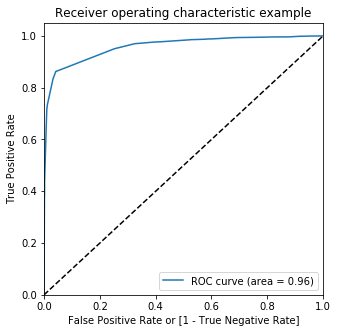

In [175]:
# plotting ROC curve

draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)

Smaller values on the x-axis of the plot indicate lower false positives and higher true negatives.

Larger values on the y-axis of the plot indicate higher true positives and lower false negatives.

ROC can also be viewed as tradeoff between Sensitivity and Specificity : When True Positive Rate increases, False Positive also increases. Same, when Sensitivity increases (1-Specificity) increases and Specificity decreases.

Higher the curve towards upper left corner higher is the area of the curve, better is the model.

In our ROC curve area under curve is 96%, which shows that the model is very good.

### Optimal Cutoff Point 
##### Here we get balanced Sensitivity and Specificity to get optimal cutoff

In [176]:
# Create columns with different probability cutoffs

cutoff = [float(x)/10 for x in range(10)]
for i in cutoff:
    y_train_pred_final[i] = y_train_pred_final.Converted_Prob.map(lambda x:1 if x>i else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,Lead ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.187214,7962,0,1,1,0,0,0,0,0,0,0,0
1,0,0.144009,5520,0,1,1,0,0,0,0,0,0,0,0
2,0,0.022292,1962,0,1,0,0,0,0,0,0,0,0,0
3,1,0.962713,1566,1,1,1,1,1,1,1,1,1,1,1
4,0,0.022292,9170,0,1,0,0,0,0,0,0,0,0,0


In [177]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['probability','accuracy','sensitivity','specificity'])
from sklearn.metrics import confusion_matrix

cut = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in cut:
    co1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(co1))
    accuracy = (co1[0,0]+co1[1,1])/total1
    
    specificity = co1[0,0]/(co1[0,0]+co1[0,1])
    sensitivity = co1[1,1]/(co1[1,0]+co1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensitivity,specificity]
print(cutoff_df)

     probability  accuracy  sensitivity  specificity
0.0          0.0  0.379630     1.000000     0.000000
0.1          0.1  0.777150     0.971476     0.658234
0.2          0.2  0.829096     0.946672     0.757146
0.3          0.3  0.921532     0.860686     0.958765
0.4          0.4  0.921532     0.860686     0.958765
0.5          0.5  0.921532     0.860686     0.958765
0.6          0.6  0.921532     0.860686     0.958765
0.7          0.7  0.916981     0.833402     0.968125
0.8          0.8  0.891086     0.732121     0.988363
0.9          0.9  0.884809     0.712278     0.990387


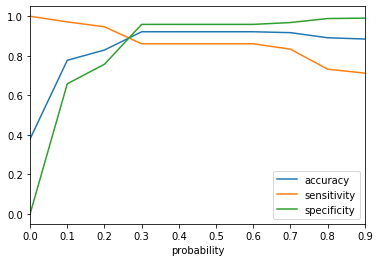

In [178]:
# Plot accuracy sensitivity and specificity for all probabilities.
cutoff_df.plot.line(x='probability', y=['accuracy','sensitivity','specificity'])
plt.show()

Curve show that 0.25 is the optimum point to take it as a cutoff probability.

In [179]:
# Adding a column 'final_predicted' in the y_train_pred_final dataframe, where optimal cutoff is 0.28

y_train_pred_final['final_predicted'] = y_train_pred_final.Converted_Prob.map( lambda x: 1 if x > 0.28 else 0)

y_train_pred_final.head()

,Converted,Converted_Prob,Lead ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.187214,7962,0,1,1,0,0,0,0,0,0,0,0,0
1,0,0.144009,5520,0,1,1,0,0,0,0,0,0,0,0,0
2,0,0.022292,1962,0,1,0,0,0,0,0,0,0,0,0,0
3,1,0.962713,1566,1,1,1,1,1,1,1,1,1,1,1,1
4,0,0.022292,9170,0,1,0,0,0,0,0,0,0,0,0,0


In [180]:
# Check the overall accuracy again.
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.9215317011927181

Accuracy is still not impacted. It is very high at 92%.

In [181]:
# Check confusion metrics again
confusion_2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion_2

array([[3790,  163],
       [ 337, 2082]], dtype=int64)

In [182]:
# assigning values of confusion_2 to variables.

TP = confusion_2[1,1] # true positive 
TN = confusion_2[0,0] # true negatives
FP = confusion_2[0,1] # false positives
FN = confusion_2[1,0] # false negatives

In [183]:
# Check SENSITIVITY again
TP / float(TP+FN)

0.8606862339809839

In [184]:
# Check SPECIFICITY again
TN / float(TN+FP)

0.9587654945610928

In [185]:
# Calculate FALSE POSITIVE RATE again
print(FP/ float(TN+FP))

0.04123450543890716


In [186]:
# Check POSITIVE PREDICTIVE RATE again 
print (TP / float(TP+FP))

0.9273942093541203


In [187]:
# Check NEGATIVE PREDICTIVE RATE again
print (TN / float(TN+ FN))

0.918342621759147


Our all parameters like Sensitivity, Specificity, False Positive Rate, Positive Predicted Rate and Negative Predicted Rate are still not impacted and are high.

### Precision and Recall

Precision = True Positive/(True Positive + False Positive)

Precision describes how good a model is at predicting the positive class. Precision is referred to as the positive predictive value.

Recall = True Positive/(True Positive + False Negative)

Recall is calculated as the ratio of the number of true positives divided by the sum of the true positives and the false negatives. Recall is the same as Sensitivity.

Precision is high when threshold is high and Recall is low.

Reviewing both precision and recall is useful in cases where there is an imbalance in the observations between the two classes.

In [188]:
# let's check confusion again
confusion

array([[3790,  163],
       [ 337, 2082]], dtype=int64)

In [189]:
#assigning values to variables

TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

###### Precision - TP / TP + FP

In [190]:
# Precision

TP /(TP + FP)

0.9273942093541203

###### Recall - TP / TP + FN

In [191]:
# Recall

TP /(TP + FN)

0.8606862339809839

Key to the calculation of precision and recall is that the calculations do not make use of the true negatives.

Precision is 92% - 92% of our results which are relevant.

Recall is 86% - 86% percentage of total relevant results correctly classified by our algorithm.

### TRADEOFF -- Precision and Recall

A precision-recall curve is a plot of the precision (y-axis) and the recall (x-axis) for different thresholds.

In [192]:
# import precision_recall_curve

from sklearn.metrics import precision_recall_curve

In [193]:
# plotting Precision and Recall curve

y_train_pred_final.Converted, y_train_pred_final.Predicted

(0       0
 1       0
 2       0
 3       1
 4       0
        ..
 6367    0
 6368    1
 6369    1
 6370    1
 6371    0
 Name: Converted, Length: 6372, dtype: int64, 0       0
 1       0
 2       0
 3       1
 4       0
        ..
 6367    0
 6368    1
 6369    1
 6370    1
 6371    0
 Name: Predicted, Length: 6372, dtype: int64)

In [194]:
# plotting Precision and Recall curve

p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)

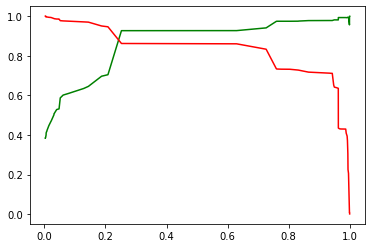

In [195]:
# TRADEOFF - plotting Precision and Recall curve

plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

The precision-recall curve shows the tradeoff between precision and recall for different threshold. A high area under the curve represents both high recall and high precision, where high precision relates to a low false positive rate, and high recall relates to a low false negative rate.

Curve show that 0.25 is the optimum point to take it as a cutoff probability.

### Making predictions on the Test Set

In [196]:
# Scaling

#X_test[['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']] = scaler.transform(X_test[['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']])

In [197]:
# Read the dataset

X_test = X_test[col]
X_test.head()

,Lead Source_Direct Traffic,Lead Source_Welingak Website,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Olark Chat Conversation,Tags_Closed by Horizzon,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Other_Tags,Tags_Ringing,Tags_Will revert after reading the email,Last Notable Activity_SMS Sent
3504,0,0,0,0,0,0,0,0,0,1,0,0
4050,0,0,0,0,0,0,0,0,0,0,1,1
7201,1,0,0,0,0,0,0,0,1,0,0,1
1196,0,0,0,0,0,0,0,0,0,1,0,0
8219,1,0,0,0,0,0,0,1,0,0,0,0


In [198]:
# adding constant to X_test

X_test_sm = sm.add_constant(X_test)

###### Now let's make prediction on the test set

In [199]:
# prediction on the test set and creating variable y_test_pred

y_test_pred = res.predict(X_test_sm)
y_test_pred[:10]

3504    0.008379
4050    0.996181
7201    0.128545
1196    0.008379
8219    0.987006
8747    0.208050
9048    0.208050
6524    0.022292
7693    0.128545
8187    0.078647
dtype: float64

In [200]:
# Let's convert y_test_pred into DataFrame and read

y_pred = pd.DataFrame(y_test_pred)
y_pred.head()

,0
3504,0.008379
4050,0.996181
7201,0.128545
1196,0.008379
8219,0.987006


In [201]:
# Converting y_test to DataFrame
y_test_df = pd.DataFrame(y_test)

In [202]:
# Putting Lead ID to index
y_test_df['Lead ID'] = y_test_df.index

In [203]:
# Removing index for both dataframes

y_pred.reset_index(drop = True, inplace = True)
y_test_df.reset_index(drop = True, inplace = True)

In [204]:
# appending y_pred and y_test_df

y_pred_final = pd.concat([y_test_df, y_pred], axis=1)
y_pred_final.head()

,Converted,Lead ID,0
0,0,3504,0.008379
1,1,4050,0.996181
2,0,7201,0.128545
3,0,1196,0.008379
4,1,8219,0.987006


In [205]:
# Let's rename the column '0' to 'Converted_Prob'

y_pred_final = y_pred_final.rename(columns = {0 : 'Converted_Prob'})

In [206]:
# Rearrange - Lead ID, Converted, Converted_Prob 

#y_pred_final = y_pred_final.reindex_axis(['Lead ID', 'Converted', 'Converted_Prob'], axis=1)
y_pred_final = y_pred_final.reindex(['Lead ID','Converted','Converted_Prob'], axis=1)

y_pred_final.head()

,Lead ID,Converted,Converted_Prob
0,3504,0,0.008379
1,4050,1,0.996181
2,7201,0,0.128545
3,1196,0,0.008379
4,8219,1,0.987006


In [207]:
# add new column 'final_predicted' in the y_pred_final dataframe where cutoff propability is 0.28.

y_pred_final['final_predicted'] = y_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.28 else 0)

In [208]:
# reading the dataframe

y_pred_final.head()

,Lead ID,Converted,Converted_Prob,final_predicted
0,3504,0,0.008379,0
1,4050,1,0.996181,1
2,7201,0,0.128545,0
3,1196,0,0.008379,0
4,8219,1,0.987006,1


In [209]:
# Check the overall accuracy.
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted)

0.9285975833028195

In [210]:
# Confusion matrix

confusion_3 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
confusion_3

array([[1635,   54],
       [ 141,  901]], dtype=int64)

In [211]:
# assigning confusion matrix values to variables.

TP = confusion_3[1,1] # true positive 
TN = confusion_3[0,0] # true negatives
FP = confusion_3[0,1] # false positives
FN = confusion_3[1,0] # false negatives

In [212]:
# Sensitivity
TP / float(TP+FN)

0.8646833013435701

In [213]:
# SPECIFICITY
TN / float(TN+FP)

0.9680284191829485

In [214]:
# Calculate FALSE POSITIVE RATE
print(FP/ float(TN+FP))

0.03197158081705151


In [215]:
# Check POSITIVE PREDICTIVE RATE
print (TP / float(TP+FP))

0.9434554973821989


In [216]:
# Check NEGATIVE PREDICTIVE RATE
print (TN / float(TN+ FN))

0.9206081081081081


In [217]:
#Check Precision 

TP / (TP + FP)

0.9434554973821989

In [218]:
# Check Recall 

TP /(TP + FN)

0.8646833013435701

Finally after making prediction on the test dataset we get following parameters: - 
    
    Accuracy - 92% - Accuracy of our model is 92%.
    
    Sensitivity - 86% - High Sensitivity implies that the model will correctly identify almost all leads who are likely to convert. It measures how often a test correctly generates a positive result for leads who have been converted (also known as the “true positive” rate). At 86% sensitivity model flag almost everyone who has got converted and not generate many false-negative results.
    
    Recall - 86% - Same as Sensitivity.
    
    Specificity - 96% - High specificity will correctly rule out almost everyone who does not get converted and won't generate many false-positive results.Specificity measures this model's ability to correctly generate a negative result for leads who don’t have converted (also known as the “true negative” rate).
    
    False Positive Rate - 3% - (1-Specificity) - the false positive rate is defined as the probability of rejecting the null hypothesis when it is true. Here in our model False Positive Rate is 3% which is very less. It means there are very minute chances of predicting negative converts as positive.
    
    Positive Predictive Rate - 94% - It says that the 94% of the values are True positive out of total positives predicted(True Positives + False Positives). It makes the model efficient.
    
    Precision - 94% - Precision is same as Positive Predictive Rate. It expresses the 94% of the data points our model says are relevant actually are relevant.
    
    Negative Predictive Rate - 92% - It says that 92% of the values are True Negative out of total negative predicted(True Negative + False Negative).

Now, let's assign a lead score between 0 and 100 to each of the leads which can be used by the company to target potential leads.

In [219]:
# Creating lead score column to y_pred_final dataframe.

y_pred_final[' lead score'] = y_pred_final.	Converted_Prob * 100
y_pred_final.head()

,Lead ID,Converted,Converted_Prob,final_predicted,lead score
0,3504,0,0.008379,0,0.837872
1,4050,1,0.996181,1,99.618086
2,7201,0,0.128545,0,12.854493
3,1196,0,0.008379,0,0.837872
4,8219,1,0.987006,1,98.700572


Higher lead score mean that the lead is hot, i.e. is most likely to convert whereas a lower score would mean that the lead is cold and will mostly not get converted.

There are few leads whose lead score is greater than 90, and these leads can be successfully converted. 

Leads whose lead score is around 70 and greater than 70, have high potential to get converted if nurtured properly.

Top 5 feature variables, which are impacting the prediction and has potential to impact the business positively:-

Tags_Closed by Horizzon 
Tags_Lost to EINS 
Tags_Will revert after reading the email 
Lead Source_Welingak Website 
Last Notable Activity_SMS Sent

Top 7 feature variables, which are impacting the prediction and has potential to impact the business negatively:-

Tags_Ringing
Last Activity_Converted to Lead
Last Activity_Email Bounced
Tags_Interested in other courses
Last Activity_Olark Chat Conversation
Tags_Other_Tags
Lead Source_Direct Traffic


Currently X Education has total lead conversion rate around 30%, but this model can make the lead conversion rate go all the way up to above 80%, as after building the model we are getting Sensitivity of 86% and high Sensitivity implies that the model will correctly identify almost all leads who are likely to convert. 

The Model seems to predict the Conversion Rate very well and it shall  give the CEO confidence in making good calls based on this model.